# Machine Learning Project 
## 2024/2025 - Group 16
Sarah Leuthner, 20240581 </br>
Bárbara Capitão, 20211532 </br>
Ricardo Kayseller, 20230450 </br>
Ludovica Collé, 20241449 </br>
Elisa Pacheco, 20240600 </br>

# **Index**
1. [Import Libaries](#imports) </br>
</br>
2. [Data Understanding](#dataunderstanding) </br>
2.1 [Data Exploration](#dataexploration) </br>
2.2 [Visualizations](#visuals) </br>
2.2.1 [Numeric Features](#numerics) </br>
2.2.2 [Categorical Features](#categoricals) </br>
2.2.3 [Targets](#targets) </br>
2.2.4 [Other Visualizations](#others) </br>
</br>
3. [Data Preparation](#datapreparation) </br>
3.1 [Splitting Data](#datasplit) </br>
3.2 [Missing Values](#missingvalues) </br>
3.3 [Outliers](#outliers) </br>
3.4 [Variable Encoding](#enconding) </br>
3.5 [New Features](#newfeatures) </br>
</br>
4. [Feature Selection](#featureselection) </br>
4.1 [Decision Tree](#DT) </br>
4.2 [RFE](#RFE) </br>
4.3 [LASSO](#LASSO) </br>
4.3 [Important Variables from Feature Selection](#importantvariablesFS) </br>
</br>
4. [Modelling](#Modelling) </br>
</br>

<a class="anchor" id="imports">
    
## 1. Import Libaries

</a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import os
import missingno as msno
from scipy import stats

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
from matplotlib import cm, colorbar
from matplotlib import colors as mpl_colors

import sqlite3

from sklearn import datasets
import math
from itertools import product
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
from datetime import datetime

#Encoding
from sklearn.preprocessing import LabelEncoder


#Data Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
sns.set()


from sklearn.model_selection import GridSearchCV, train_test_split #, RandomizedSearchCV, cross_val_score, StratifiedKFold

#Outliers
from collections import Counter

#Feature Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoCV
from xgboost import XGBClassifier
#from sklearn.metrics import make_scorer, f1_score


#Modeling
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier, StackingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score, classification_report

#Hypertuning
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import GridSearchCV


In [2]:
#Importing the csv file to the notebook
data_set = pd.read_csv(r"C:\Users\Bárbara C\Desktop\Mestrado\Machine lerninig\project_data\train_data.csv")
df = data_set.copy()

In [3]:
test_set = pd.read_csv(r"C:\Users\Bárbara C\Desktop\Mestrado\Machine lerninig\project_data\test_data.csv")
test = test_set.copy()


In [4]:
agreement_reached_test = pd.read_csv(r"C:\Users\Bárbara C\Downloads\Agreement_Reached_test.csv")

> As part of our open section, we predicted the Agreement_Reached variable for the test dataset in the notebook OpenSectionC. This allows us to compare the results with and without incorporating Agreement_Reached in our final model.
>To enable this comparison, we will merge the test dataset with the CSV file containing the predictions for this variable.

In [5]:
test_dataframe = pd.merge(
    test,  
    agreement_reached_test,  
    on='Claim Identifier',  
    how='left'  
)

In [6]:
test_dataframe.head(5)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents,Agreement Reached
0,2022-12-24,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,INDEMNITY INSURANCE CO OF,...,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,10466,1,No
1,2022-11-20,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,A I U INSURANCE COMPANY,...,NaN,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,10.0,MULTIPLE HEAD INJURY,11691,1,No
2,2022-12-26,59,N,2023-01-02,N,0.0,1963.0,2022-12-31,NaN,AMGUARD INSURANCE COMPANY,...,NaN,68.0,STATIONARY OBJECT,49.0,SPRAIN OR TEAR,62.0,BUTTOCKS,10604,0,No
3,2022-12-28,55,N,2023-01-02,N,0.0,0.0,2023-01-02,NaN,INDEMNITY INS. OF N AMERICA,...,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),10.0,CONTUSION,53.0,KNEE,11411,6,No
4,2022-12-20,25,N,2023-01-02,N,0.0,1997.0,2022-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,40.0,LACERATION,37.0,THUMB,11212,5,No


In [7]:
test = test_dataframe.copy()

In [8]:
test['Agreement Reached'] = test['Agreement Reached'].replace({'Yes': 1.0, 'No': 0.0})

In [9]:
test.head(5)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents,Agreement Reached
0,2022-12-24,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,INDEMNITY INSURANCE CO OF,...,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,10466,1,0.0
1,2022-11-20,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,A I U INSURANCE COMPANY,...,NaN,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,10.0,MULTIPLE HEAD INJURY,11691,1,0.0
2,2022-12-26,59,N,2023-01-02,N,0.0,1963.0,2022-12-31,NaN,AMGUARD INSURANCE COMPANY,...,NaN,68.0,STATIONARY OBJECT,49.0,SPRAIN OR TEAR,62.0,BUTTOCKS,10604,0,0.0
3,2022-12-28,55,N,2023-01-02,N,0.0,0.0,2023-01-02,NaN,INDEMNITY INS. OF N AMERICA,...,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),10.0,CONTUSION,53.0,KNEE,11411,6,0.0
4,2022-12-20,25,N,2023-01-02,N,0.0,1997.0,2022-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,40.0,LACERATION,37.0,THUMB,11212,5,0.0


In [10]:
# Checking for duplicates in 'Claim Identifier', the dataset index
duplicate_ids = df['Claim Identifier'][df['Claim Identifier'].duplicated()]

print("Duplicate Claim Identifiers:")
for claim_id in duplicate_ids.unique():
    print(claim_id)

duplicates = df[df['Claim Identifier'].duplicated(keep=False)]

duplicates

Duplicate Claim Identifiers:
292668076


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
257901,NaN,NaN,NaN,2021-05-21,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
526445,NaN,NaN,NaN,2022-09-05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> As we can see, the Claim Identifier 292668076 is duplicated, and the rows are not identical because the 'Assembly Date' differs between them. The best approach is to remove both rows

In [11]:
# Removing all rows with duplicate 'Claim Identifier' values
df = df[~df['Claim Identifier'].isin(duplicate_ids)]

In [12]:
#Seting the index
df = df.set_index('Claim Identifier')
df = df.sort_index()

In [13]:
df.head(5)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5393066,2019-09-17,64.0,N,2020-01-01,N,1345.97,1954.0,2020-01-01,NaN,HARTFORD FIRE INSURANCE CO,...,97.0,REPETITIVE MOTION,46.0,RUPTURE,38.0,SHOULDER(S),NaN,1.0,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
5393667,2019-12-23,54.0,N,2020-01-01,N,0.00,1965.0,2020-01-01,NaN,"DELHAIZE AMERICA, LLC",...,30.0,"SLIP, OR TRIP, DID NOT FALL",10.0,CONTUSION,55.0,ANKLE,12189,0.0,Not Work Related,3.0
5393769,2019-11-14,56.0,N,2020-01-02,N,0.00,0.0,NaN,NaN,SAFETY NATIONAL CASUALTY CORP,...,NaN,NaN,NaN,NaN,NaN,NaN,18426,0.0,Not Work Related,6.0
5393770,2019-12-31,26.0,N,2020-01-02,N,0.00,1993.0,2020-01-02,2019-12-31,STATE INSURANCE FUND,...,12.0,OBJECT HANDLED,10.0,CONTUSION,36.0,FINGER(S),13202,0.0,Not Work Related,5.0


<a class="anchor" id="dataunderstanding">
    
## 2. Data Unterstanding

</a>

<a class="anchor" id="dataexploration">
    
### 2.1 Data Exploration

</a>

In [14]:
#check the dimensions of dataframe
df.shape

(593469, 32)

In [15]:
test.shape

(387975, 31)

In [16]:
#check the columns in dataframe
df.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Injury Type', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'First Hearing Date', 'Gender', 'IME-4 Count',
       'Industry Code', 'Industry Code Description', 'Medical Fee Region',
       'OIICS Nature of Injury Description', 'WCIO Cause of Injury Code',
       'WCIO Cause of Injury Description', 'WCIO Nature of Injury Code',
       'WCIO Nature of Injury Description', 'WCIO Part Of Body Code',
       'WCIO Part Of Body Description', 'Zip Code', 'Agreement Reached',
       'WCB Decision', 'Number of Dependents'],
      dtype='object')

In [17]:
test.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'First Hearing Date', 'Gender', 'IME-4 Count',
       'Industry Code', 'Industry Code Description', 'Medical Fee Region',
       'OIICS Nature of Injury Description', 'WCIO Cause of Injury Code',
       'WCIO Cause of Injury Description', 'WCIO Nature of Injury Code',
       'WCIO Nature of Injury Description', 'WCIO Part Of Body Code',
       'WCIO Part Of Body Description', 'Zip Code', 'Number of Dependents',
       'Agreement Reached'],
      dtype='object')

In [18]:
#check the data type of each column and evidence of missing values among many variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593469 entries, 5393066 to 999891667
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593469 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Injury Type     

**Notes on the DataFrame Information:**

* Most columns have object values
* There are missing values in most of the columns
* "OIICS Nature of Injury Description" can be droppped -> no values
* WCIO Cause of Injury Description, WCIO Nature of Injury Description, WCIO Part Of Body Description (-> Decription only needed for interpretation, no different value than the codes) 

In [19]:
#convert the accident date to the type of datatime to get all the values of this variable
df['Accident Date'] = pd.to_datetime(df['Accident Date'], errors='coerce')
df['First Hearing Date'] = pd.to_datetime(df['First Hearing Date'], errors='coerce')
df['Assembly Date'] = pd.to_datetime(df['Assembly Date'], errors='coerce')

df['C-2 Date'] = pd.to_datetime(df['C-2 Date'])
df['C-3 Date'] = pd.to_datetime(df['C-3 Date'])

In [20]:
test['Accident Date'] = pd.to_datetime(test['Accident Date'], errors='coerce')
test['First Hearing Date'] = pd.to_datetime(test['First Hearing Date'], errors='coerce')
test['Assembly Date'] = pd.to_datetime(test['Assembly Date'], errors='coerce')

test['C-2 Date'] = pd.to_datetime(test['C-2 Date'])
test['C-3 Date'] = pd.to_datetime(test['C-3 Date'])

In [21]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Accident Date,570337,2021-04-28 21:00:27.892982528,1961-09-06 00:00:00,2020-09-14 00:00:00,2021-06-27 00:00:00,2022-03-21 00:00:00,2023-09-29 00:00:00,NaN
Age at Injury,574026.0,42.11427,0.0,31.0,42.0,54.0,117.0,14.256432
Assembly Date,593469,2021-07-19 03:24:46.765442816,2020-01-01 00:00:00,2020-10-26 00:00:00,2021-07-29 00:00:00,2022-04-19 00:00:00,2022-12-31 00:00:00,NaN
Average Weekly Wage,545375.0,491.088321,0.0,0.0,0.0,841.0,2828079.0,6092.91812
Birth Year,544948.0,1886.767604,0.0,1965.0,1977.0,1989.0,2018.0,414.644423
C-2 Date,559466,2021-07-16 20:11:19.865442816,1996-01-12 00:00:00,2020-11-06 00:00:00,2021-08-09 00:00:00,2022-04-26 00:00:00,2024-06-01 00:00:00,NaN
C-3 Date,187245,2021-07-26 21:31:28.449892608,1992-11-13 00:00:00,2020-10-27 00:00:00,2021-07-21 00:00:00,2022-04-20 00:00:00,2024-05-31 00:00:00,NaN
First Hearing Date,150798,2022-03-19 05:07:38.218279168,2020-01-30 00:00:00,2021-06-01 00:00:00,2022-03-09 00:00:00,2023-01-11 00:00:00,2024-06-07 00:00:00,NaN
IME-4 Count,132803.0,3.207337,1.0,1.0,2.0,4.0,73.0,2.832303
Industry Code,564068.0,58.645305,11.0,45.0,61.0,71.0,92.0,19.644175


In [22]:
df.describe(include="O").T

,count,unique,top,freq
Alternative Dispute Resolution,574026,3,N,571412
Attorney/Representative,574026,2,N,392291
Carrier Name,574026,2046,STATE INSURANCE FUND,111144
Carrier Type,574026,8,1A. PRIVATE,285368
Claim Injury Type,574026,8,2. NON-COMP,291078
County of Injury,574026,63,SUFFOLK,60430
COVID-19 Indicator,574026,2,N,546505
District Name,574026,8,NYC,270779
Gender,574026,4,M,335218
Industry Code Description,564068,20,HEALTH CARE AND SOCIAL ASSISTANCE,114339


### Key Observations:

1. **Accident Date**:
   - **Count**: 570,337 entries.
   - **Unique Values**: 5,539 different accident dates, with the most frequent being March 1, 2020.
   - **Relevance**: Dates are well-represented with many unique values, indicating a broad range of accidents over time.

2. **Age at Injury**:
   - **Mean Age**: 42.1 years, with a standard deviation of 14.26, showing variability in the age of injured workers.
   - **Min/Max Age**: 0 years (likely erroneous) to 117 years, indicating potential data quality issues.
   - **Relevance**: Age distribution seems reasonable, but some data cleaning (e.g., unrealistic ages) might be needed.

3. **Alternative Dispute Resolution**:
   - **Most Common Value**: "No" (N), representing 571,412 cases, showing that ADR is rarely used.
   - **Relevance**: This suggests that most cases do not involve alternative resolution mechanisms.

4. **Attorney/Representative**:
   - **Most Common Value**: "No" (N), with 392,291 cases, indicating that most workers do not have legal representation.
   - **Relevance**: This may reflect the accessibility of legal resources for workers or the nature of claims.

5. **Average Weekly Wage**:
   - **Mean**: $491.09, with a very high standard deviation ($6,092), indicating outliers and wage variability.
   - **Relevance**: The wide range, from $0 to over $2.8 million, suggests outliers or extreme cases that may need further investigation.

6. **Birth Year**:
   - **Mean**: 1886 (clearly an error), with a large standard deviation.
   - **Relevance**: This column has significant data quality issues and should be cleaned (many birth years are unrealistic).

7. **Carrier Name**:
   - **Most Common Carrier**: "State Insurance Fund" with 111,144 entries.
   - **Relevance**: This suggests that this insurance carrier is prominent, possibly reflecting government-backed insurance.

8. **COVID-19 Indicator**:
   - **Most Common Value**: "No" (N), indicating that most cases are not related to COVID-19.
   - **Relevance**: This dataset covers a broad time range, with few cases related to the pandemic.

9. **Gender**:
   - **Most Common Value**: Male (335,218 entries), showing a gender imbalance in the dataset.
   - **Relevance**: Gender differences could be relevant for understanding the demographic distribution of injuries.

10. **Industry Code Description**:
    - **Most Common Industry**: "Health Care and Social Assistance" with 114,339 entries.
    - **Relevance**: This suggests that this industry is heavily represented, which could be significant for occupational health studies.

11. **Zip Code**:
    - **Mean Zip Code**: 12,500, but with a wide range (min = 0, max = 99,999), suggesting some invalid data.
    - **Relevance**: Location data could be useful, but some zip codes may need to be cleaned (e.g., zero or very high values).

12. **WCB Decision**:
    - **Most Common Value**: "Not Work Related" for all 574,026 entries.
    - **Relevance**: This indicates that this dataset is filtered for non-work-related cases, which is an important context for any analysis.

13. **Number of Dependents**:
    - **Mean**: 3 dependents, with a max of 6.
    - **Relevance**: Understanding the family context of injured workers can be important for claims analysis.

### Final Notes:
- **Data Quality**: Some columns, such as "Birth Year" and "Average Weekly Wage," show extreme or incorrect values, indicating the need for data cleaning before further analysis.
- **Wage Variability**: The wide range in wages (from $0 to over $2.8 million) suggests significant disparities, possibly due to outliers or varying types of claims.
- **Demographic Insights**: The dataset covers a broad demographic, but there is a gender imbalance (more males), and certain industries (e.g., health care) are heavily represented.
- **Filtered Data**: The "WCB Decision" column shows that all cases are "Not Work Related," meaning the dataset is focused on non-occupational claims.

**Descripitive Statistics for data:**
* Injury occure mostly for people older than 31 years, with the majority between 31 and 54 years. The minimum of 0 years implicates missing data, the maximum age of 117 years could be false data or an extreme outlier
* The minimum year in Birth Year it's 0 this is an error
* The maxium value in Average Weekly Wage it's very high could be a false data or an extreme outlier if we check the minimun and the other stastistics about this variable
* We don't have any information about OIICS Nature of Injury Description
* In WCIO Part Of Body Code the minimum value is negative could be false data or an input error

### 2.2. Checking incoherences and anomalies

In [23]:
# check for rows where COVID-19 Indicator is "Y" and Accident Date is before 2020
pre_pandemic_covid_cases = df[(df['COVID-19 Indicator'] == 'Y') & (df['Accident Date'] < '2020-01-01')]

pre_pandemic_covid_cases = pre_pandemic_covid_cases[['Accident Date','COVID-19 Indicator']]

pre_pandemic_covid_cases


,Accident Date,COVID-19 Indicator
Claim Identifier,,
5401736,2019-12-17,Y
5642885,2019-12-22,Y


>It is not an inconsistency because these cases are from December 2019, when COVID-19 began

In [24]:
#Age at Injury diferent from Accident Year−Birth Year

df_f = df.copy()
df_f['Birth Year'] = df['Birth Year'].replace([0.0], np.nan)
df_f['Age at Injury'] = df['Age at Injury'].replace([0.0], np.nan)

# check rows where the difference between calculated and provided Age at Injury is more than 1
filtered_df = df_f[abs(df_f['Age at Injury'] - (df_f['Accident Date'].dt.year - df_f['Birth Year'])) > 1]

filtered_df = filtered_df[['Accident Date', 'Birth Year', 'Age at Injury']]
print(filtered_df)


Empty DataFrame
Columns: [Accident Date, Birth Year, Age at Injury]
Index: []



> Here, we aimed to determine if the age at injury differed from the calculation of the accident date minus the birth year. As we can observe, when substituting the 0 values in age and birth year with NaN, this discrepancy does not appear in the dataset. 

In [25]:
#Check if theres very young workers with unusually high Average Weekly Wage.

high_wage_threshold = 2000

young_high_wage_cases = df_f[(df_f['Age at Injury'] < 18) & (df['Average Weekly Wage'] > high_wage_threshold)]

young_high_wage_cases = young_high_wage_cases[['Age at Injury', 'Average Weekly Wage']]
young_high_wage_cases


,Age at Injury,Average Weekly Wage
Claim Identifier,,
5579602,17.0,2026.65


In [26]:
# Check for rows where First Hearing Date is before Assembly Date

filtered_df = df[
    (df['Assembly Date'] > df['First Hearing Date'])
]

filtered_df = filtered_df[['Accident Date', 'C-2 Date', 'C-3 Date', 'Assembly Date', 'First Hearing Date']]

filtered_df

,Accident Date,C-2 Date,C-3 Date,Assembly Date,First Hearing Date
Claim Identifier,,,,,


In [27]:
# Check for rows where First Hearing Date is before Assembly Date

filtered_df = df[
    (df['Assembly Date'] == df['C-2 Date'])
]

filtered_df = filtered_df[['Accident Date', 'C-2 Date', 'C-3 Date', 'Assembly Date', 'First Hearing Date']]

filtered_df

,Accident Date,C-2 Date,C-3 Date,Assembly Date,First Hearing Date
Claim Identifier,,,,,
5393066,2019-09-17,2020-01-01,NaT,2020-01-01,NaT
5393091,2019-08-30,2020-01-01,2020-01-14,2020-01-01,2020-02-21
5393667,2019-12-23,2020-01-01,NaT,2020-01-01,NaT
5393770,2019-12-31,2020-01-02,2019-12-31,2020-01-02,NaT
5393772,2019-12-13,2020-01-02,2020-05-12,2020-01-02,NaT
...,...,...,...,...,...
6165680,2022-12-19,2022-12-30,2023-03-06,2022-12-30,2024-04-09
6165681,2022-11-14,2022-12-30,NaT,2022-12-30,NaT
6165683,2022-11-19,2022-12-30,NaT,2022-12-30,NaT


In [28]:
# Check for rows where Accident Date is after C-2 Date, C-3 Date, Assembly Date, or First Hearing Date 

filtered_df = df[
    (df['Accident Date'] > df['C-2 Date']) | 
    (df['Accident Date'] > df['C-3 Date']) | 
    (df['Accident Date'] > df['Assembly Date']) | 
    (df['Accident Date'] > df['First Hearing Date'])
]

filtered_df = filtered_df[['Accident Date', 'C-2 Date', 'C-3 Date', 'Assembly Date', 'First Hearing Date']]

filtered_df

,Accident Date,C-2 Date,C-3 Date,Assembly Date,First Hearing Date
Claim Identifier,,,,,
5393820,2020-01-02,2020-06-05,2019-12-26,2020-01-02,2020-07-08
5393830,2020-03-01,2020-01-17,2019-12-27,2020-01-02,2020-08-28
5393953,2020-02-26,2019-12-31,2020-01-31,2020-01-01,2020-05-04
5394099,2020-01-23,2020-01-14,2019-12-27,2020-01-02,2020-06-05
5394146,2020-01-02,2020-02-11,2019-12-26,2020-01-02,2020-03-09
...,...,...,...,...,...
6162010,2023-02-02,2022-12-26,NaT,2022-12-26,2023-11-16
6162263,2022-12-28,2022-12-26,NaT,2022-12-26,NaT
6162694,2022-12-19,2022-12-27,2022-12-14,2022-12-27,2023-12-01


In [29]:
# Check the ages
age_bins = [-1, 0, 10, 18, 25, 30, 40, 50, 60, 70, 80, 90, 100, 120]  # Age range boundaries
age_labels = ["0", "1-9", "10-18", "18-25", "25-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-90", "90-100", "100+"]  # Labels for each age range

age_category_counts = pd.cut(df['Age at Injury'], bins=age_bins, labels=age_labels)

age_category_counts_sorted = age_category_counts.value_counts().sort_index()

print(age_category_counts_sorted)

Age at Injury
0           5464
1-9           20
10-18       5676
18-25      64265
25-30      65604
30-40     129612
40-50     118033
50-60     127283
60-70      51167
70-80       6111
80-90        625
90-100       112
100+          54
Name: count, dtype: int64


>It doesn’t make sense to have so many injured children listed as 0 years old; these entries should be treated as missing values

In [30]:
df["Alternative Dispute Resolution"].value_counts()

Alternative Dispute Resolution
N    571412
Y      2609
U         5
Name: count, dtype: int64

> The 'U' should be treated has a missing value

In [31]:
##check if all the values are between 2020 and 2022

assembly_date_counts = df['Assembly Date'].value_counts()

sorted_assembly_date_counts = assembly_date_counts.sort_index()
print(sorted_assembly_date_counts)

Assembly Date
2020-01-01    169
2020-01-02    546
2020-01-03    836
2020-01-04     21
2020-01-05     18
             ... 
2022-12-27    633
2022-12-28    684
2022-12-29    684
2022-12-30    629
2022-12-31     19
Name: count, Length: 1096, dtype: int64


In [32]:
df["Attorney/Representative"].value_counts()

Attorney/Representative
N    392291
Y    181735
Name: count, dtype: int64

In [33]:
salary_bins = [-1, 1, 50, 100, 200, 500, 600, 1500, 3000, 10000, 50000, 1000000, 3000000]  # Salary range boundaries
salary_labels = ["0","1-50", "50-100", "100-200", "200-500", "500-600", "600-1500", "1500-3000", "3000-10000", "10000-500000","50000-1000000", "1000000 +"]  # Labels for each salary range

salary_category_counts = pd.cut(df['Average Weekly Wage'], bins=salary_bins, labels=salary_labels).value_counts().sort_index()

print(salary_category_counts)

Average Weekly Wage
0                335450
1-50                 23
50-100              119
100-200            1732
200-500           22815
500-600           13355
600-1500         113202
1500-3000         53554
3000-10000         5064
10000-500000         42
50000-1000000        14
1000000 +             5
Name: count, dtype: int64


> As observed earlier, some of the salaries appear unexpectedly high.

In [34]:
birth_years_counts = df['Birth Year'].value_counts()

sorted_birth_years_counts = birth_years_counts.sort_index(ascending=True)
print(sorted_birth_years_counts)

Birth Year
0.0       25081
1900.0        2
1901.0       30
1902.0       28
1903.0       35
          ...  
2011.0        6
2012.0        2
2013.0        1
2014.0        2
2018.0        2
Name: count, Length: 107, dtype: int64


> The '0' values should be treated has missing values, some values look very unlikely (ex: 1900)

In [35]:
c2_dates_counts = df['C-2 Date'].value_counts()

c2_dates_counts = c2_dates_counts.sort_index(ascending=True)
print(c2_dates_counts)

C-2 Date
1996-01-12    1
1996-01-31    1
1996-02-14    2
1996-03-06    1
1996-03-29    1
             ..
2024-05-13    2
2024-05-15    1
2024-05-17    1
2024-05-31    2
2024-06-01    1
Name: count, Length: 2475, dtype: int64


In [36]:
c3_dates_counts = df['C-3 Date'].value_counts()

c3_dates_counts = c3_dates_counts.sort_index(ascending=True)
print(c3_dates_counts)

C-3 Date
1992-11-13     1
2010-05-14     1
2010-07-29     1
2010-08-27     1
2010-10-08     1
              ..
2024-05-24    10
2024-05-28     8
2024-05-29     3
2024-05-30     4
2024-05-31     1
Name: count, Length: 1648, dtype: int64


In [37]:
carrier_list = df["Carrier Name"].unique().tolist()

print(carrier_list)
print(len(carrier_list))

['HARTFORD FIRE INSURANCE CO', 'ZURICH AMERICAN INSURANCE CO', 'DELHAIZE AMERICA, LLC', 'SAFETY NATIONAL CASUALTY CORP', 'STATE INSURANCE FUND', 'TOWN OF LANCASTER', 'SELECTIVE INSURANCE COMPANY', 'AMTRUST INS CO OF KANSAS INC', 'TECHNOLOGY INSURANCE CO INC', 'UNIVERSITY OF ROCHESTER 1979', 'WEGMANS FOOD MARKETS, INC.', 'NEW HAMPSHIRE INSURANCE CO', 'WAL-MART ASSOCIATES, INC.', 'POLICE, FIRE, SANITATION', 'INDEMNITY INS. OF N AMERICA', 'XL INSURANCE AMERICA', 'AMERICAN ZURICH INSURANCE CO', 'FEDERAL INSURANCE COMPANY', 'LM INSURANCE CORP', 'ACIG INSURANCE COMPANY', 'FIRE DISTRICTS OF NEW YORK', "PENNSYLVANIA MANUFACTURERS'", 'MEMIC CASUALTY COMPANY', 'AMGUARD INSURANCE COMPANY', 'CHEROKEE INSURANCE COMPANY', 'NYC TRANSIT AUTHORITY', 'ST. LAWRENCE-LEWIS COUNTIES', 'PUBLIC EMPLOYERS RISK MGMT.', 'SOMPO AMERICA FIRE & MARINE', 'INDEMNITY INSURANCE CO OF', 'ARCH INDEMNITY INSURANCE CO', 'OTSEGO COUNTY SELF INSURANCE', 'OLD REPUBLIC INSURANCE CO.', 'HARTFORD ACCIDENT & INDEMNITY', 'LIBERTY 

> Some values are the same but have comas or points

In [38]:
df["Carrier Type"].value_counts()

Carrier Type
1A. PRIVATE                                    285368
3A. SELF PUBLIC                                121920
2A. SIF                                        111144
4A. SELF PRIVATE                                52788
UNKNOWN                                          1774
5D. SPECIAL FUND - UNKNOWN                       1023
5C. SPECIAL FUND - POI CARRIER WCB MENANDS          5
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)         4
Name: count, dtype: int64

In [39]:
df["Claim Injury Type"].value_counts()

Claim Injury Type
2. NON-COMP        291078
4. TEMPORARY       148507
3. MED ONLY         68906
5. PPD SCH LOSS     48280
1. CANCELLED        12477
6. PPD NSL           4211
8. DEATH              470
7. PTD                 97
Name: count, dtype: int64

In [40]:
#Check if we have only New York County
county_list = df["County of Injury"].unique().tolist()

print(county_list)

['GENESEE', 'WYOMING', 'ALBANY', 'ORANGE', 'ONONDAGA', 'ERIE', 'SCHENECTADY', 'ONEIDA', 'TOMPKINS', 'CATTARAUGUS', 'LIVINGSTON', 'MONROE', 'SUFFOLK', 'MADISON', 'ST. LAWRENCE', 'CAYUGA', 'CHEMUNG', 'DUTCHESS', 'SENECA', 'CHAUTAUQUA', 'OTSEGO', 'NIAGARA', 'TIOGA', 'YATES', 'BROOME', 'PUTNAM', 'SCHUYLER', 'WARREN', 'NASSAU', 'QUEENS', 'BRONX', 'NEW YORK', 'WESTCHESTER', 'RICHMOND', 'KINGS', 'COLUMBIA', 'SARATOGA', 'RENSSELAER', 'WASHINGTON', 'ULSTER', 'GREENE', 'ROCKLAND', 'ONTARIO', 'SULLIVAN', 'ORLEANS', 'JEFFERSON', 'HERKIMER', 'STEUBEN', 'FULTON', 'UNKNOWN', 'CHENANGO', 'OSWEGO', 'CLINTON', 'DELAWARE', 'LEWIS', 'MONTGOMERY', 'CORTLAND', 'ALLEGANY', 'FRANKLIN', 'ESSEX', 'WAYNE', 'SCHOHARIE', 'HAMILTON', nan]


In [41]:
df["District Name"].value_counts()

District Name
NYC           270779
ALBANY         86171
HAUPPAUGE      60536
BUFFALO        45605
SYRACUSE       44646
ROCHESTER      40449
BINGHAMTON     21864
STATEWIDE       3976
Name: count, dtype: int64

In [42]:
first_date_counts = df['First Hearing Date'].value_counts()

first_date_counts = first_date_counts.sort_index()
print(first_date_counts)

First Hearing Date
2020-01-30     2
2020-01-31     1
2020-02-04     1
2020-02-06    11
2020-02-07     5
              ..
2024-06-03    45
2024-06-04    42
2024-06-05    43
2024-06-06    28
2024-06-07    25
Name: count, Length: 1094, dtype: int64


In [43]:
df["IME-4 Count"].value_counts()

IME-4 Count
1.0     40112
2.0     34504
3.0     16136
4.0     13781
5.0      7680
6.0      6427
7.0      3838
8.0      3156
9.0      1915
10.0     1460
11.0     1002
12.0      807
13.0      516
14.0      396
15.0      273
16.0      214
18.0      140
17.0      125
19.0       79
20.0       56
21.0       53
22.0       34
23.0       19
24.0       16
27.0       14
26.0        8
25.0        7
29.0        5
28.0        4
30.0        4
32.0        4
34.0        4
36.0        3
33.0        2
31.0        2
39.0        2
37.0        1
48.0        1
35.0        1
47.0        1
73.0        1
Name: count, dtype: int64

> Some values are very high

In [44]:
df['Industry Code'].unique()

array([33., 23., 44., 61., 92., nan, 42., 62., 45., 56., 72., 52., 48.,
       81., 32., 49., 53., 31., 51., 71., 54., 22., 55., 21., 11.])

In [45]:
df['WCIO Cause of Injury Code'].unique()

array([97., 30., nan, 12., 56., 57., 16., 25., 32., 27., 81., 68., 59.,
       29., 87., 79., 13., 31., 60., 99., 74., 17., 52., 89., 26., 19.,
       45., 98., 53., 66., 58., 55., 33., 77., 50., 28., 82., 75., 46.,
        1., 90.,  6.,  2.,  5., 15., 54., 69., 85., 70., 11., 78., 18.,
       84.,  4., 95., 80., 61.,  9., 67., 10.,  3., 76., 65., 93., 48.,
       94., 20., 96., 83., 88.,  7., 86., 41.,  8., 14., 91., 40., 47.])

In [46]:
df['WCIO Nature of Injury Code'].unique()

array([46., 49., 10., nan, 52., 43., 59., 16., 25., 40., 78., 31., 71.,
        1., 28., 37., 34.,  7.,  3., 80., 90.,  4., 65., 13., 47., 53.,
       42., 36., 77., 72., 19., 68., 60.,  2., 41., 69., 73., 54., 91.,
       66., 58., 74., 83., 55., 75., 32., 61., 22., 67., 76., 30., 62.,
       64., 38., 79., 70., 63.])

In [47]:
df['WCIO Part Of Body Code'].unique()

array([38., 55., nan, 36., 53., 37., 10., 43., 42., -9., 30., 14., 35.,
       90., 17., 61., 54., 56., 32., 39., 13., 44., 20., 41., 31., 34.,
       33., 60., 62., 23., 50., 18., 51., 91., 52., 65., 11., 25., 22.,
       66., 58., 19., 49., 16., 99., 40., 57., 46., 48., 15., 21., 63.,
       12., 64., 45., 24., 47., 26.])

In [48]:
valid_codes = [
    10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 
    21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 30.0, 31.0, 32.0, 33.0, 34.0, 
    35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 
    46.0, 47.0, 48.0, 49.0, 60.0, 61.0, 62.0, 63.0, 50.0, 51.0, 52.0, 
    53.0, 54.0, 55.0, 56.0, 57.0
]

invalid_codes_in_df = df[~df['WCIO Part Of Body Code'].isin(valid_codes)]['WCIO Part Of Body Code'].unique()

print("Values that are not in the 'valid_codes list':", invalid_codes_in_df)

Values that are not in the 'valid_codes list': [nan -9. 90. 91. 65. 66. 58. 99. 64.]


In [49]:
df["Medical Fee Region"].value_counts()

Medical Fee Region
IV     265981
I      135885
II      85033
III     53654
UK      33473
Name: count, dtype: int64

> The 'UK' should be treated as nan

In [50]:
def filter_zip_codes(zip_codes):
    valid_zip_codes = []
    invalid_zip_codes = []
    
    for code in zip_codes:
        if isinstance(code, str):
            code = code.strip()
            
            #check for valid USA ZIP code (#####)
            if len(code) == 5 and code.isdigit():
                valid_zip_codes.append(code)
                
            #check for valid Canadian Postal Code (A#A #A#)
            elif len(code) == 7 and code[3] == ' ' and code[0:1].isalpha() and code[1:2].isdigit() and code[2:3].isalpha() and \
                 code[4:5].isdigit() and code[5:6].isalpha() and code[6:7].isdigit():
                valid_zip_codes.append(code)
            else:
                invalid_zip_codes.append(code)
        else:
            invalid_zip_codes.append(code)

    return valid_zip_codes, invalid_zip_codes

valid_zip_codes, invalid_zip_codes = filter_zip_codes(df['Zip Code'])

unique_invalid_zip_codes = pd.Series(invalid_zip_codes).unique().tolist()
print("Unique Invalid ZIP Codes:", unique_invalid_zip_codes)

Unique Invalid ZIP Codes: [nan, 'L1N 5', 'T1B0P', 'L6Y 1', 'JMDMR', 'N2P 1', 'H7X3Z', 'L2N 3', 'L0R 1', 'L1A 3', 'T4R1E', 'L7L 6', 'L2W 1', 'K9K 1', '.1605', 'M4E1S', 'L2A 5', 'T2V', 'UNKNO', 'J0L1B', 'AB106', 'J1H2Y', 'L2A 1', 'T1J5G', 'H2T2W', '22-40', 'M3K2C', 'M3K2B', 'T1S 0', 'N6C4E', 'H1V2L', 'V6Z3G', 'KOC 1', 'M6S5B', 'V3H1H', 'L1C0K', 'L2H0H', 'JOL1B', 'SLV', 'BT48-', 'L5N7C', 'JMDCN', 'V6T1Z', 'T2X3P', 'L2A1R', 'L4A0G', 'K6H2L', 'H1V3S', 'L6H 3', 'JMAKN', 'J0J1S', 'B3E1A', 'V6T5C', 'JMBTS', 'V2B0E', 'T6R 0', 'JMDWD', 'M6K3C', 'L9W', 'S7R 0', 'F94A0', 'P7G', 'Z2E1N', 'L0S1N', 'K2L 4', 'H1G0A', 'B3M 3', 14817.0, 13905.0, 12839.0, 12779.0, 11787.0, 12180.0, 10990.0, 13083.0, 11725.0, 14701.0, 11746.0, 14211.0, 11717.0, 11729.0, 14132.0, 11720.0, 13733.0, 11738.0, 12721.0, 12804.0, 14108.0, 13421.0, 12189.0, 12776.0, 14904.0, 10940.0, 11706.0, 12866.0, 11355.0, 32940.0, 10465.0, 11561.0, 11234.0, 11370.0, 10305.0, 13212.0, 14609.0, 11221.0, 10552.0, 11235.0, 11207.0, 11209.0, 1121

In [51]:
valid_zip_codes = pd.Series(valid_zip_codes).unique().tolist()
print(valid_zip_codes)

['14569', '12189', '18426', '13202', '14086', '12150', '13354', '13068', '14743', '14517', '14420', '11701', '13032', '13669', '11704', '14580', '14606', '13092', '13203', '14614', '13212', '14830', '12569', '14202', '13476', '11950', '14025', '14428', '11788', '11746', '13694', '14004', '14048', '11776', '13326', '14108', '14609', '11779', '11941', '14423', '14883', '11764', '14171', '14464', '11742', '13108', '14304', '14903', '11717', '14701', '14623', '11784', '13029', '14094', '13102', '11967', '14170', '14622', '14478', '11754', '13088', '14223', '13165', '14612', '11772', '12550', '85750', '13790', '14075', '14620', '14527', '11796', '13662', '10512', '13435', '14891', '14213', '11756', '13646', '12603', '12205', '12589', '14621', '11769', '12801', '12306', '12116', '12208', '11550', '11428', '11377', '10475', '07010', '10703', '10314', '11206', '11208', '10462', '10466', '10473', '11378', '11101', '08872', '12533', '12534', '12771', '12019', '06422', '10804', '10452', '10128', 

In [52]:
# Remove '.0' from invalid zip codes
cleaned_zip_codes = []

for code in invalid_zip_codes:
    if isinstance(code, float) and code.is_integer():
        cleaned_zip_codes.append(str(int(code)))  # Convert to int to remove '.0'
    else:
        cleaned_zip_codes.append(str(code))  # Keep other codes as is

unique_cleaned_zip_codes = pd.Series(cleaned_zip_codes).unique().tolist()
print("Cleaned ZIP Codes:", unique_cleaned_zip_codes)

Cleaned ZIP Codes: ['nan', 'L1N 5', 'T1B0P', 'L6Y 1', 'JMDMR', 'N2P 1', 'H7X3Z', 'L2N 3', 'L0R 1', 'L1A 3', 'T4R1E', 'L7L 6', 'L2W 1', 'K9K 1', '.1605', 'M4E1S', 'L2A 5', 'T2V', 'UNKNO', 'J0L1B', 'AB106', 'J1H2Y', 'L2A 1', 'T1J5G', 'H2T2W', '22-40', 'M3K2C', 'M3K2B', 'T1S 0', 'N6C4E', 'H1V2L', 'V6Z3G', 'KOC 1', 'M6S5B', 'V3H1H', 'L1C0K', 'L2H0H', 'JOL1B', 'SLV', 'BT48-', 'L5N7C', 'JMDCN', 'V6T1Z', 'T2X3P', 'L2A1R', 'L4A0G', 'K6H2L', 'H1V3S', 'L6H 3', 'JMAKN', 'J0J1S', 'B3E1A', 'V6T5C', 'JMBTS', 'V2B0E', 'T6R 0', 'JMDWD', 'M6K3C', 'L9W', 'S7R 0', 'F94A0', 'P7G', 'Z2E1N', 'L0S1N', 'K2L 4', 'H1G0A', 'B3M 3', '14817', '13905', '12839', '12779', '11787', '12180', '10990', '13083', '11725', '14701', '11746', '14211', '11717', '11729', '14132', '11720', '13733', '11738', '12721', '12804', '14108', '13421', '12189', '12776', '14904', '10940', '11706', '12866', '11355', '32940', '10465', '11561', '11234', '11370', '10305', '13212', '14609', '11221', '10552', '11235', '11207', '11209', '11218', 

In [53]:
invalid_zip_codes = []

for code in unique_cleaned_zip_codes:
    #check if the zip code does not have exactly 5 characters or is not numeric
    if not (len(code) == 5 and code.isnumeric()):
        invalid_zip_codes.append(code)

print(invalid_zip_codes)

['nan', 'L1N 5', 'T1B0P', 'L6Y 1', 'JMDMR', 'N2P 1', 'H7X3Z', 'L2N 3', 'L0R 1', 'L1A 3', 'T4R1E', 'L7L 6', 'L2W 1', 'K9K 1', '.1605', 'M4E1S', 'L2A 5', 'T2V', 'UNKNO', 'J0L1B', 'AB106', 'J1H2Y', 'L2A 1', 'T1J5G', 'H2T2W', '22-40', 'M3K2C', 'M3K2B', 'T1S 0', 'N6C4E', 'H1V2L', 'V6Z3G', 'KOC 1', 'M6S5B', 'V3H1H', 'L1C0K', 'L2H0H', 'JOL1B', 'SLV', 'BT48-', 'L5N7C', 'JMDCN', 'V6T1Z', 'T2X3P', 'L2A1R', 'L4A0G', 'K6H2L', 'H1V3S', 'L6H 3', 'JMAKN', 'J0J1S', 'B3E1A', 'V6T5C', 'JMBTS', 'V2B0E', 'T6R 0', 'JMDWD', 'M6K3C', 'L9W', 'S7R 0', 'F94A0', 'P7G', 'Z2E1N', 'L0S1N', 'K2L 4', 'H1G0A', 'B3M 3', '7822', '7047', '6482', '7032', '7062', '7104', '6763', '7070', '7040', '6820', '7882', '7726', '7052', '7421', '7642', '7660', '7728', '7103', '6610', '6810', '7601', '7083', '7093', '7302', '8527', '5478', '7632', '6606', '7738', '8857', '8618', '7306', '7304', '677', '7458', '7834', '7018', '7011', '7624', '7603', '6401', '6830', '7036', '8863', '7206', '7073', '7105', '7002', '7305', '7108', '7463',

In [54]:
df["Agreement Reached"].value_counts()

Agreement Reached
0.0    547239
1.0     26787
Name: count, dtype: int64

In [55]:
test["Agreement Reached"].value_counts()

Agreement Reached
0.0    362960
1.0     25015
Name: count, dtype: int64

In [56]:
df["Number of Dependents"].value_counts()

Number of Dependents
6.0    82653
3.0    82299
5.0    82075
4.0    81904
1.0    81823
0.0    81665
2.0    81607
Name: count, dtype: int64

#### 2.2.1. Treating Incoherences

In [57]:
#replacing specific strings with np.nan in the entire DataFrame
df = df.replace('nan', np.nan)
df = df.replace('UK', np.nan)
df = df.replace('U', np.nan)
df['County of Injury'] = df['County of Injury'].replace('UNKNOWN', np.nan)

df['WCIO Part Of Body Code'] = df['WCIO Part Of Body Code'].replace([-9.0, 90.0, 91.0, 65.0, 66.0, 58.0, 99.0, 64.0],np.nan)

df['Birth Year'] = df['Birth Year'].replace([0.0], np.nan)
df['Age at Injury'] = df['Age at Injury'].replace([0.0], np.nan)

In [58]:
test = test.replace('nan', np.nan)
test = test.replace('UK', np.nan)
test = test.replace('U', np.nan)
test['County of Injury'] = test['County of Injury'].replace('UNKNOWN', np.nan)

test['WCIO Part Of Body Code'] = test['WCIO Part Of Body Code'].replace([-9.0, 90.0, 91.0, 65.0, 66.0, 58.0, 99.0, 64.0],np.nan)

test['Birth Year'] = test['Birth Year'].replace([0.0], np.nan)
test['Age at Injury'] = test['Age at Injury'].replace([0.0], np.nan)

In [59]:
# replacing invalid zip codes with NaN
df['Zip Code'] = df['Zip Code'].apply(lambda x: np.nan if x in invalid_zip_codes else x)
test['Zip Code'] = test['Zip Code'].apply(lambda x: np.nan if x in invalid_zip_codes else x)

In [60]:
df['Carrier Name'] = df['Carrier Name'].str.replace('.', '', regex = False).str.replace(',', '', regex = False)
test['Carrier Name'] = test['Carrier Name'].str.replace('.', '', regex = False).str.replace(',', '', regex = False)

In [61]:
initial_row_count = len(df)

invalid_accident_date_condition = (
    (df['Accident Date'] > df['C-2 Date']) |
    (df['Accident Date'] > df['C-3 Date']) |
    (df['Accident Date'] > df['Assembly Date']) |
    (df['Accident Date'] > df['First Hearing Date'])
)

#set Accident Date to nan for invalid rows
df.loc[invalid_accident_date_condition, 'Accident Date'] = np.nan

final_row_count = len(df)
rows_affected = invalid_accident_date_condition.sum()
percentage_affected = (rows_affected / initial_row_count) * 100

print(f"Percentage of rows affected: {percentage_affected:.2f}%")

Percentage of rows affected: 0.29%


In [62]:
invalid_accident_date_condition_test = (
    (test['Accident Date'] > test['C-2 Date']) |
    (test['Accident Date'] > test['C-3 Date']) |
    (test['Accident Date'] > test['Assembly Date']) |
    (test['Accident Date'] > test['First Hearing Date'])
)

test.loc[invalid_accident_date_condition_test, 'Accident Date'] = np.nan

In [63]:
#We decided to drop all rows that contain only the 'Assembly Date' and the index 'Claim Identifier'
columns_to_check = ['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
                    'Attorney/Representative', 'Average Weekly Wage',
                    'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
                    'Claim Injury Type', 'County of Injury',
                    'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender',
                    'IME-4 Count', 'Industry Code', 'Industry Code Description',
                    'Medical Fee Region', 'OIICS Nature of Injury Description',
                    'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
                    'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
                    'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
                    'Agreement Reached', 'WCB Decision', 'Number of Dependents']

condition = df[columns_to_check].isna().all(axis=1)

df = df[~condition]

final_row_count = len(df)

percentage_dropped = ((initial_row_count - final_row_count) / initial_row_count) * 100
print(f"Percentage of rows dropped: {percentage_dropped:.2f}%")

Percentage of rows dropped: 3.28%


In [64]:
#check the % of missing values of each variable
missing_values = df.isna().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentage
})

missing_data_sorted = missing_data.sort_values(by='Missing Percentage', ascending=False)
print(missing_data_sorted)

                                    Missing Values  Missing Percentage
OIICS Nature of Injury Description          574026          100.000000
IME-4 Count                                 441223           76.864637
First Hearing Date                          423228           73.729761
C-3 Date                                    386781           67.380397
WCIO Part Of Body Code                      107173           18.670409
Birth Year                                   54159            9.434938
Medical Fee Region                           33473            5.831269
Zip Code                                     28986            5.049597
Average Weekly Wage                          28651            4.991237
WCIO Part Of Body Description                17082            2.975823
WCIO Nature of Injury Description            15657            2.727577
WCIO Nature of Injury Code                   15657            2.727577
WCIO Cause of Injury Description             15640            2.724615
WCIO C

**RULE** Many data science resources recommend thresholds around 30% to 50% missing values as a rule of thumb. Above this threshold, filling the values can introduce bias or noise, and removing the variable might be preferable.

### Critical Missing Data Analysis:

1. **C-3 Date**: 67.38% missing. 
- **Action**: With such a high percentage of missing data, this column is a candidate for removal unless there’s a specific reason to retain it. The data might not be available for most cases.
   

2. **First Hearing Date**: 73.72% missing.
- **Action**: This column has an even higher percentage of missing data. If it’s not essential for the analysis, it’s recommended to remove it.

3. **IME-4 Count**: 76.86% missing.
- **Action**: This column can likely be removed due to the high percentage of missing values, as it may not be relevant to most cases.

4. **OIICS Nature of Injury Description**: 100.00% missing.
- **Action**: Since all values are missing, this column should be removed from the dataset.

### Final Recommendation:
- **Columns to remove**: "C-3 Date", "First Hearing Date", "IME-4 Count", "OIICS Nature of Injury Description".
- These columns have high percentages of missing data and are unlikely to provide meaningful insights in their current state. It's best to drop them to improve data quality and reduce unnecessary noise in your analysis
- However, before dropping them, we should see if they can provide relevant insights

## 3. Data Preprocessing

### 3.1 Split Data

In [65]:
target = df['Claim Injury Type']
df.drop(['Claim Injury Type'], axis=1,  inplace=True)

In [66]:
X_train, X_val, y_train, y_val = train_test_split(df, target,
                                                 train_size=0.75,
                                                 stratify = target,
                                                 random_state = 42)

### 3.2 Outliers

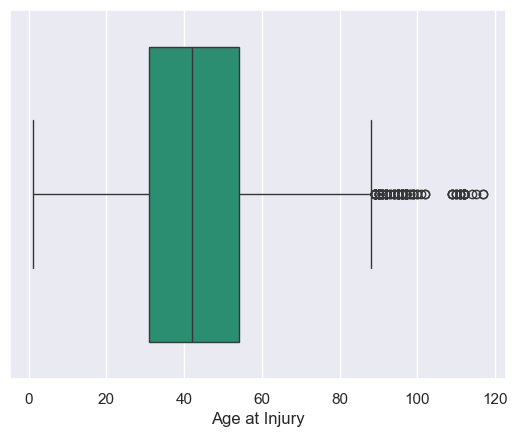

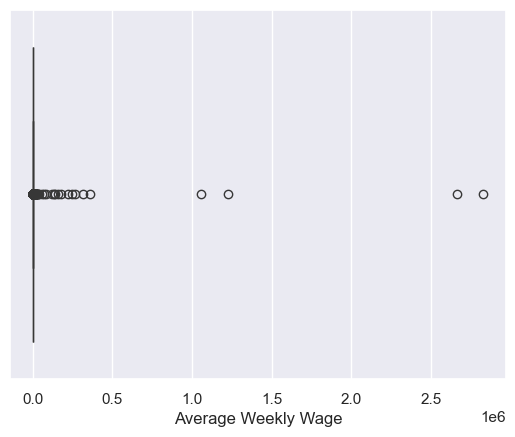

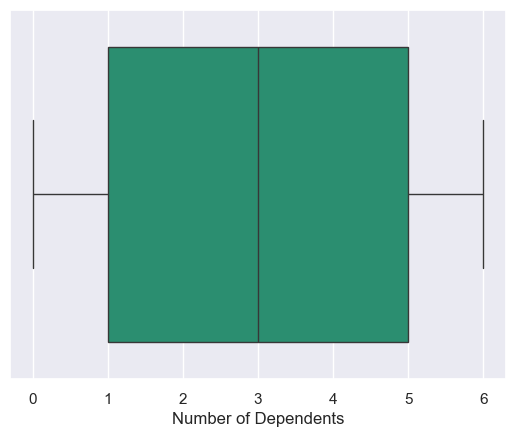

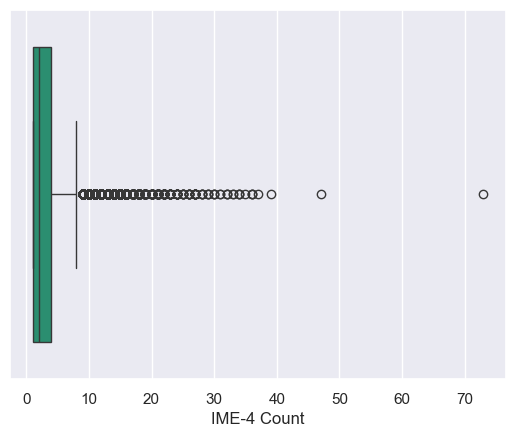

In [67]:
numerical_features = ["Age at Injury", "Average Weekly Wage", "Number of Dependents", 'IME-4 Count']

#plot a boxplot for each column
for i in X_train[numerical_features]:
    sns.boxplot(data = X_train, x = i, palette = 'Dark2')
    plt.show()

In [68]:
features = ["Age at Injury", "Average Weekly Wage", "IME-4 Count"]

percentiles_99 = {}

for feature in features:
    percentile_99 = np.percentile(X_train[feature].dropna(), 99)
    percentiles_99[feature] = percentile_99
    print(f"99th Percentile for {feature}: {percentile_99}")


99th Percentile for Age at Injury: 71.0
99th Percentile for Average Weekly Wage: 2964.6502000000005
99th Percentile for IME-4 Count: 14.0


In [69]:
percentiles_1 = {}

for feature in features:
    percentile_1 = np.percentile(X_train[feature].dropna(), 1)
    percentiles_1[feature] = percentile_1
    print(f"1th Percentile for {feature}: {percentile_1}")

1th Percentile for Age at Injury: 19.0
1th Percentile for Average Weekly Wage: 0.0
1th Percentile for IME-4 Count: 1.0


In [70]:
filters = (
    
    (X_train['Age at Injury']<=89)
    &
    (X_train['Average Weekly Wage']<=10000)
    &
    (X_train['Age at Injury']>=10)
)                              

X_train = X_train[filters]
y_train = y_train[filters]


<a class="anchor" id="missingvalues">
    
### 3.3 Missing Values

</a>

In [71]:
datasets = [X_train, X_val, test]

In [72]:
X_train['C-2 Date Binary'] = X_train['C-2 Date'].notna().astype(int)
X_val['C-2 Date Binary'] = X_val['C-2 Date'].notna().astype(int)
test['C-2 Date Binary'] = test['C-2 Date'].notna().astype(int)

In [73]:
columns = ['Accident Date','C-2 Date'] 
for col in columns:
    #Calculating the average difference in days between the dates
    mean_days_diff = (X_train['Assembly Date'] - X_train[col]).dt.days.mean()
    print(f"Average days between {col} and Assembly Date: {mean_days_diff} days")
    for df in datasets: 
        df[col] = df.apply(
            lambda row: row['Assembly Date'] - pd.Timedelta(days=mean_days_diff) if pd.isnull(row[col]) else row[col], axis=1)
        
X_train[['Accident Date', 'Assembly Date', 'C-2 Date']].head()

Average days between Accident Date and Assembly Date: 78.88894697331942 days
Average days between C-2 Date and Assembly Date: 3.828482517376622 days


,Accident Date,Assembly Date,C-2 Date
Claim Identifier,,,
5894651,2022-01-01,2022-01-10,2022-01-10
5850530,2021-10-30,2021-11-04,2021-11-04
5705618,2021-04-15,2021-04-21,2021-04-21
5725357,2021-05-07,2021-05-18,2021-05-18
6102313,2022-09-27,2022-10-06,2022-10-06


In [74]:
#Age at injury
# as accident date and assembly date have on average only some mothns diference and the age at injury is the age in accidente date
# we can calculate the age by finding the year difference between Assembly Date and Birth Year
# Only for rows where Age at Injury is missing

for df in datasets:
    mask = df['Age at Injury'].isna() & df['Accident Date'].notna() & df['Birth Year'].notna()
    df.loc[mask, 'Age at Injury'] = df.loc[mask, 'Accident Date'].dt.year - df.loc[mask, 'Birth Year']

median_age_injury = X_train['Age at Injury'].median()

for df in datasets:
            df['Age at Injury'] = df['Age at Injury'].fillna(median_age_injury).apply(np.floor).astype(int)
X_train[['Accident Date', 'Birth Year', 'Age at Injury']].tail(70)

,Accident Date,Birth Year,Age at Injury
Claim Identifier,,,
5766861,2021-07-14,1967.0,54
5671744,2021-02-18,1966.0,54
5961847,2022-04-03,1973.0,49
6081769,2022-08-23,1961.0,61
6000101,2022-04-28,1976.0,45
...,...,...,...
5791325,2021-08-07,2001.0,19
5508826,2020-06-28,1998.0,22
5801930,2021-06-11,NaN,48


In [75]:
median_col = X_train['Age at Injury'].median()

for df in datasets:
    df['Age at Injury'] = df['Age at Injury'].fillna(median_col).apply(np.floor).astype(int)
   

In [76]:
columns = ['Alternative Dispute Resolution'] 

for col in columns:
    col_mode = X_train[col].mode()[0]
    print(col_mode)
    for df in datasets:
            df[col] = df[col].fillna(col_mode)
    

N


In [77]:
def impute_mode_grouping_by_category(col_1, col_2, row, col_2_mode, general_mode):
    if pd.isna(row[col_1]):
        if pd.notna(row[col_2]):
            return col_2_mode.get(row[col_2], general_mode)  
        else:
            return general_mode
    else:
        return row[col_1]

In [78]:
columns = ['Carrier Type', 'Carrier Name', 'Gender']

for col_1 in columns:
    industry_mode = X_train.groupby('Industry Code')[col_1].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    
    general_mode = X_train[col_1].mode().iloc[0] 
    print(col_1)
    print(general_mode)


    for df in datasets:
        df[col_1] = df.apply(lambda row: impute_mode_grouping_by_category(col_1=col_1, col_2='Industry Code', row=row, col_2_mode=industry_mode, general_mode=general_mode), axis=1)
    
    print(X_train[col_1])

Carrier Type
1A. PRIVATE
Claim Identifier
5894651     3A. SELF PUBLIC
5850530         1A. PRIVATE
5705618         1A. PRIVATE
5725357         1A. PRIVATE
6102313         1A. PRIVATE
                 ...       
5791325         1A. PRIVATE
5508826         1A. PRIVATE
5801930     3A. SELF PUBLIC
5529429    4A. SELF PRIVATE
5775199     3A. SELF PUBLIC
Name: Carrier Type, Length: 404864, dtype: object
Carrier Name
STATE INSURANCE FUND
Claim Identifier
5894651         NIAGARA CO MUT SELF INS
5850530       INDEMNITY INSURANCE CO OF
5705618    AMERICAN ZURICH INSURANCE CO
5725357       ACE AMERICAN INSURANCE CO
6102313     ARCH INDEMNITY INSURANCE CO
                       ...             
5791325        NEW JERSEY MANUFACTURERS
5508826      NEW HAMPSHIRE INSURANCE CO
5801930          POLICE FIRE SANITATION
5529429        WEGMANS FOOD MARKETS INC
5775199        RYE CITY SCHOOL DISTRICT
Name: Carrier Name, Length: 404864, dtype: object
Gender
M
Claim Identifier
5894651    M
5850530    F
5705618

In [79]:
#County of Injury
district_mode = X_train.groupby('District Name')['County of Injury'].apply(lambda z: z.mode().iloc[0] if not z.mode().empty else None)

county_general_mode = X_train['County of Injury'].mode().iloc[0]

for df in datasets:
    df['County of Injury'] = df.apply(lambda row: impute_mode_grouping_by_category(col_1='County of Injury', col_2='District Name', row=row, col_2_mode=district_mode, general_mode=county_general_mode), axis=1)

print(X_train['County of Injury'])

Claim Identifier
5894651        NIAGARA
5850530       ONONDAGA
5705618          BRONX
5725357          BRONX
6102313         QUEENS
              ...     
5791325         QUEENS
5508826       DUTCHESS
5801930          BRONX
5529429         MONROE
5775199    WESTCHESTER
Name: County of Injury, Length: 404864, dtype: object


In [80]:
#Average Weekly Wage    
wage_industry_median = X_train.groupby('Industry Code')['Average Weekly Wage'].median()
print(wage_industry_median)

wage_general_median = X_train['Average Weekly Wage'].median()
print(wage_general_median)

for df in datasets:
        df['Average Weekly Wage'] = df.apply(lambda row: impute_mode_grouping_by_category(col_1='Average Weekly Wage', col_2='Industry Code', row=row, col_2_mode=wage_industry_median, general_mode=wage_general_median), axis=1)


Industry Code
11.0      0.000
21.0      0.000
22.0      0.000
23.0    480.925
31.0      0.000
32.0      0.000
33.0      0.000
42.0      0.000
44.0      0.000
45.0      0.000
48.0    250.000
49.0      0.000
51.0      0.000
52.0      0.000
53.0      0.000
54.0      0.000
55.0      0.000
56.0      0.000
61.0      0.000
62.0      0.000
71.0      0.000
72.0      0.000
81.0      0.000
92.0      0.000
Name: Average Weekly Wage, dtype: float64
0.0


In [81]:
def fill_with_county_and_district_mode(df, target_column, county_column, district_column, global_fallback):
    mode_per_county =  X_train.groupby(county_column)[target_column].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    mode_per_district =  X_train.groupby(district_column)[target_column].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

    df[target_column] = df.apply(
        lambda row: (
            mode_per_county[row[county_column]] if pd.isnull(row[target_column]) and pd.notnull(row[county_column])
            else mode_per_district[row[district_column]] if pd.isnull(row[target_column]) and pd.notnull(row[district_column])
            else global_fallback if pd.isnull(row[target_column])
            else row[target_column]
        ),
        axis=1
    )
    return df

medical_mode = X_train['Medical Fee Region'].mode()[0]

for df in datasets:
    fill_with_county_and_district_mode(df, target_column = 'Medical Fee Region' , county_column = 'County of Injury' , district_column = 'District Name', global_fallback = medical_mode)

In [82]:
data = {
    'Industry Code': [11.0, 21.0, 22.0, 23.0, 31.0, 32.0, 33.0, 42.0, 44.0, 45.0,
                      48.0, 49.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 61.0, 
                      62.0, 71.0, 72.0, 81.0, 92.0],
    'Industry Code Description': [
        'AGRICULTURE, FORESTRY, FISHING AND HUNTING', 'MINING', 'UTILITIES', 
        'CONSTRUCTION', 'MANUFACTURING', 'MANUFACTURING', 'MANUFACTURING', 
        'WHOLESALE TRADE', 'RETAIL TRADE', 'RETAIL TRADE', 
        'TRANSPORTATION AND WAREHOUSING', 'TRANSPORTATION AND WAREHOUSING', 
        'INFORMATION', 'FINANCE AND INSURANCE', 'REAL ESTATE AND RENTAL AND LEASING', 
        'PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES', 
        'MANAGEMENT OF COMPANIES AND ENTERPRISES', 
        'ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIATION', 
        'EDUCATIONAL SERVICES', 'HEALTH CARE AND SOCIAL ASSISTANCE', 
        'ARTS, ENTERTAINMENT, AND RECREATION', 
        'ACCOMMODATION AND FOOD SERVICES', 
        'OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)', 
        'PUBLIC ADMINISTRATION'
    ]
}

mode_industry = X_train['Industry Code'].mode()[0] 

X_train['Industry Code'] = X_train['Industry Code'].apply(pd.to_numeric, errors='coerce')
X_val['Industry Code'] = X_val['Industry Code'].apply(pd.to_numeric, errors='coerce')
test['Industry Code'] = test['Industry Code'].apply(pd.to_numeric, errors='coerce')


X_train['Industry Code Description'] = X_train['Industry Code Description'].astype(str)
X_val['Industry Code Description'] = X_val['Industry Code Description'].astype(str)
test['Industry Code Description'] = test['Industry Code Description'].astype(str)


aggregated_df = X_train.groupby('Industry Code').agg(
    {'Industry Code Description': lambda x: sorted(x.unique())}
).reset_index()

industry_dict = dict(zip(aggregated_df['Industry Code'], aggregated_df['Industry Code Description']))

industry_dict

X_train['Industry Code'] = X_train['Industry Code'].fillna(mode_industry)
X_val['Industry Code'] = X_val['Industry Code'].fillna(mode_industry)
test['Industry Code'] = test['Industry Code'].fillna(mode_industry)


industry_dict = dict(zip(X_train['Industry Code'], X_train['Industry Code Description']))

X_train['Industry Code Description'] = X_train['Industry Code'].map(industry_dict)
X_val['Industry Code Description'] = X_val['Industry Code'].map(industry_dict)
test['Industry Code Description'] = test['Industry Code'].map(industry_dict)


X_train[['Industry Code', 'Industry Code Description']].head(10)


,Industry Code,Industry Code Description
Claim Identifier,,
5894651,92.0,PUBLIC ADMINISTRATION
5850530,62.0,HEALTH CARE AND SOCIAL ASSISTANCE
5705618,44.0,RETAIL TRADE
5725357,23.0,CONSTRUCTION
6102313,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...
5798486,62.0,HEALTH CARE AND SOCIAL ASSISTANCE
5818637,62.0,HEALTH CARE AND SOCIAL ASSISTANCE
5719407,92.0,PUBLIC ADMINISTRATION
5478827,23.0,CONSTRUCTION


In [83]:
#We search to get the codes and theirs descriptions

# WCIO Cause of Injury Code and their Descriptions as per the provided order
cause_of_injury_dict = {
    1.0: 'Chemicals',
    2.0: 'Hot Objects or Substances',
    3.0: 'Temperature Extremes',
    4.0: 'Fire or Flame',
    5.0: 'Steam or Hot Fluids',
    6.0: 'Dust, Gases, Fumes or Vapors',
    7.0: 'Welding Operation',
    8.0: 'Radiation',
    9.0: 'Contact With, NOC',
    10.0: 'Machine or Machinery',
    11.0: 'Cold Objects or Substances',
    12.0: 'Object Handled',
    13.0: 'Caught In, Under or Between, NOC',
    14.0: 'Abnormal Air Pressure',
    15.0: 'Broken Glass',
    16.0: 'Hand Tool, Utensil; Not Powered',
    17.0: 'Object Being Lifted or Handled',
    18.0: 'Powered Hand Tool, Appliance',
    19.0: 'Cut, Puncture, Scrape, NOC',
    20.0: 'Collapsing Materials (Slides of Earth)',
    25.0: 'From Different Level (Elevation)',
    26.0: 'From Ladder or Scaffolding',
    27.0: 'From Liquid or Grease Spills',
    28.0: 'Into Openings',
    29.0: 'On Same Level',
    30.0: 'Slip, or Trip, Did Not Fall',
    31.0: 'Fall, Slip or Trip, NOC',
    32.0: 'On Ice or Snow',
    33.0: 'On Stairs',
    40.0: 'Crash of Water Vehicle',
    41.0: 'Crash of Rail Vehicle',
    45.0: 'Collision or Sideswipe With Another Vehicle',
    46.0: 'Collision with a Fixed Object',
    47.0: 'Crash of Airplane',
    48.0: 'Vehicle Upset',
    50.0: 'Motor Vehicle, NOC',
    52.0: 'Continual Noise',
    53.0: 'Twisting',
    54.0: 'Jumping or Leaping',
    55.0: 'Holding or Carrying',
    56.0: 'Lifting',
    57.0: 'Pushing or Pulling',
    58.0: 'Reaching',
    59.0: 'Using Tool or Machinery',
    60.0: 'Strain or Injury By, NOC',
    61.0: 'Wielding or Throwing',
    65.0: 'Moving Part of Machine',
    66.0: 'Object Being Lifted or Handled',
    67.0: 'Sanding, Scraping, Cleaning Operation',
    68.0: 'Stationary Object',
    69.0: 'Stepping on Sharp Object',
    70.0: 'Striking Against or Stepping On, NOC',
    74.0: 'Fellow Worker, Patient or Other Person',
    75.0: 'Falling or Flying Object',
    76.0: 'Hand Tool or Machine in Use',
    77.0: 'Motor Vehicle',
    78.0: 'Moving Parts of Machine',
    79.0: 'Object Being Lifted or Handled',
    80.0: 'Object Handled By Others',
    81.0: 'Struck or Injured, NOC',
    82.0: 'Absorption, Ingestion or Inhalation, NOC',
    83.0: 'Pandemic',
    84.0: 'Electrical Current',
    85.0: 'Animal or Insect',
    86.0: 'Explosion or Flare Back',
    87.0: 'Foreign Matter (Body) in Eye(s)',
    88.0: 'Natural Disasters',
    89.0: 'Person in Act of a Crime',
    90.0: 'Other Than Physical Cause of Injury',
    91.0: 'Mold',
    93.0: 'Gunshot',
    94.0: 'Repetitive Motion',
    95.0: 'Rubbed or Abraded, NOC',
    96.0: 'Terrorism',
    97.0: 'Repetitive Motion',
    98.0: 'Cumulative, NOC',
    99.0: 'Other - Miscellaneous, NOC'
}

mode_value = X_train['WCIO Cause of Injury Code'].mode()[0]  

for df in datasets:
    df['WCIO Cause of Injury Code'] = df['WCIO Cause of Injury Code'].fillna(mode_value)
    df['WCIO Cause of Injury Code'] = pd.to_numeric(df['WCIO Cause of Injury Code'], errors='coerce')
    df['WCIO Cause of Injury Description'] = df['WCIO Cause of Injury Code'].map(cause_of_injury_dict)


X_train[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']].head(10)

,WCIO Cause of Injury Code,WCIO Cause of Injury Description
Claim Identifier,,
5894651,89.0,Person in Act of a Crime
5850530,31.0,"Fall, Slip or Trip, NOC"
5705618,75.0,Falling or Flying Object
5725357,76.0,Hand Tool or Machine in Use
6102313,68.0,Stationary Object
5798486,74.0,"Fellow Worker, Patient or Other Person"
5818637,45.0,Collision or Sideswipe With Another Vehicle
5719407,83.0,Pandemic
5478827,81.0,"Struck or Injured, NOC"


In [84]:
# WCIO Nature of Injury Code and their Descriptions as per the provided order
nature_of_injury_dict = {
    1.0: 'No Physical Injury',
    2.0: 'Amputation',
    3.0: 'Angina Pectoris',
    4.0: 'Burn',
    7.0: 'Concussion',
    10.0: 'Contusion',
    13.0: 'Crushing',
    16.0: 'Dislocation',
    19.0: 'Electric Shock',
    22.0: 'Enucleation',
    25.0: 'Foreign Body',
    28.0: 'Fracture',
    30.0: 'Freezing',
    31.0: 'Hearing Loss or Impairment',
    32.0: 'Heat Prostration',
    34.0: 'Hernia',
    36.0: 'Infection',
    37.0: 'Inflammation',
    38.0: 'Adverse reaction to a vaccination orinoculation',
    40.0: 'Laceration',
    41.0: 'Myocardial Infarction',
    42.0: 'Poisoning - General (Not OD or Cumulative Injury)',
    43.0: 'Puncture',
    46.0: 'Rupture',
    47.0: 'Severance',
    49.0: 'Sprain or Tear',
    52.0: 'Strain or Tear',
    53.0: 'Syncope',
    54.0: 'Asphyxiation',
    55.0: 'Vascular',
    58.0: 'Vision Loss',
    59.0: 'All Other Specific Injuries, NOC',
    60.0: 'Dust Disease, NOC',
    61.0: 'Asbestosis',
    62.0: 'Black Lung',
    63.0: 'Byssinosis',
    64.0: 'Silicosis',
    65.0: 'Respiratory Disorders',
    66.0: 'Poisoning - Chemical, (Other Than Metals)',
    67.0: 'Poisoning - Metal',
    68.0: 'Dermatitis',
    69.0: 'Mental Disorder',
    70.0: 'Radiation',
    71.0: 'All Other Occupational Disease Injury, NOC',
    72.0: 'Loss of Hearing',
    73.0: 'Contagious Disease',
    74.0: 'Cancer',
    75.0: 'AIDS',
    76.0: 'VDT - Related Diseases',
    77.0: 'Mental Stress',
    78.0: 'Carpal Tunnel Syndrome',
    79.0: 'Hepatitis C',
    83.0: 'COVID-19',
    80.0: 'All Other Cumulative Injury, NOC',
    90.0: 'Multiple Physical Injuries Only',
    91.0: 'Multiple Injuries Including Both Physical and Psychological'
}

mode_value = X_train['WCIO Nature of Injury Code'].mode()[0]

for df in datasets:
    df['WCIO Nature of Injury Code'] = df['WCIO Nature of Injury Code'].fillna(mode_value)
    df['WCIO Nature of Injury Code'] = pd.to_numeric(df['WCIO Nature of Injury Code'], errors='coerce')
    df['WCIO Nature of Injury Description'] = df['WCIO Nature of Injury Code'].map(nature_of_injury_dict)

X_train[['WCIO Nature of Injury Code', 'WCIO Nature of Injury Description']].head(60)

,WCIO Nature of Injury Code,WCIO Nature of Injury Description
Claim Identifier,,
5894651,28.0,Fracture
5850530,80.0,"All Other Cumulative Injury, NOC"
5705618,37.0,Inflammation
5725357,40.0,Laceration
6102313,40.0,Laceration
5798486,13.0,Crushing
5818637,1.0,No Physical Injury
5719407,83.0,COVID-19
5478827,28.0,Fracture


In [85]:
part_body_dict = {
    10.0: 'Multiple Head Injury',
    11.0: 'Skull',
    12.0: 'Brain',
    13.0: 'Ear(s)',
    14.0: 'Eye(s)',
    15.0: 'Nose',
    16.0: 'Teeth',
    17.0: 'Mouth',
    18.0: 'Soft Tissue',
    19.0: 'Facial Bones',
    20.0: 'Multiple Neck Injury',
    21.0: 'Vertebrae',
    22.0: 'Disc',
    23.0: 'Spinal Cord',
    24.0: 'Larynx',
    25.0: 'Soft Tissue',
    26.0: 'Trachea',
    30.0: 'Multiple Upper Extremities',
    31.0: 'Upper Arm',
    32.0: 'Elbow',
    33.0: 'Lower Arm',
    34.0: 'Wrist',
    35.0: 'Hand',
    36.0: 'Finger(s)',
    37.0: 'Thumb',
    38.0: 'Shoulder(s)',
    39.0: 'Wrist (s) & Hand(s)',
    40.0: 'Multiple Trunk',
    41.0: 'Upper Back Area',
    42.0: 'Lower Back Area',
    43.0: 'Disc',
    44.0: 'Chest',
    45.0: 'Sacrum and Coccyx',
    46.0: 'Pelvis',
    47.0: 'Spinal Cord',
    48.0: 'Internal Organs',
    49.0: 'Heart',
    60.0: 'Lungs',
    61.0: 'Abdomen Including Groin',
    62.0: 'Buttocks',
    63.0: 'Lumbar & or Sacral Vertebrae(Vertebra NOC Trunk)',
    50.0: 'Multiple Lower Extremities',
    51.0: 'Hip',
    52.0: 'Upper Leg',
    53.0: 'Knee',
    54.0: 'Lower Leg',
    55.0: 'Ankle',
    56.0: 'Foot',
    57.0: 'Toes'
}


mode_value = X_train['WCIO Part Of Body Code'].mode()[0]
print(mode_value)


for df in datasets:
    df['WCIO Part Of Body Code'] = df['WCIO Part Of Body Code'].fillna(mode_value)
    df['WCIO Part Of Body Code'] = pd.to_numeric(df['WCIO Part Of Body Code'], errors='coerce')
    df['WCIO Part Of Body Description'] = df['WCIO Part Of Body Code'].map(part_body_dict)

X_train[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']].head()

42.0


,WCIO Part Of Body Code,WCIO Part Of Body Description
Claim Identifier,,
5894651,35.0,Hand
5850530,34.0,Wrist
5705618,35.0,Hand
5725357,36.0,Finger(s)
6102313,10.0,Multiple Head Injury


In [86]:
#Zip Code
X_train['Zip Code'] = X_train['Zip Code'].fillna('UNKNOWN')
X_val['Zip Code'] = X_val['Zip Code'].fillna('UNKNOWN')
test['Zip Code'] = test['Zip Code'].fillna('UNKNOWN')


In [87]:
#IME-4 Count
X_train['IME-4 Count'] = X_train['IME-4 Count'].fillna(0)
X_val['IME-4 Count'] = X_val['IME-4 Count'].fillna(0)
test['IME-4 Count'] = test['IME-4 Count'].fillna(0)


In [88]:
X_train

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,C-2 Date Binary
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5894651,2022-01-01,38,N,2022-01-10,Y,1734.45,1983.0,2022-01-10,NaT,NIAGARA CO MUT SELF INS,...,Person in Act of a Crime,28.0,Fracture,35.0,Hand,14174,0.0,Not Work Related,2.0,1
5850530,2021-10-30,50,N,2021-11-04,N,0.00,1970.0,2021-11-04,NaT,INDEMNITY INSURANCE CO OF,...,"Fall, Slip or Trip, NOC",80.0,"All Other Cumulative Injury, NOC",34.0,Wrist,13057,0.0,Not Work Related,4.0,1
5705618,2021-04-15,44,N,2021-04-21,N,0.00,1976.0,2021-04-21,NaT,AMERICAN ZURICH INSURANCE CO,...,Falling or Flying Object,37.0,Inflammation,35.0,Hand,10467,0.0,Not Work Related,5.0,1
5725357,2021-05-07,49,N,2021-05-18,N,0.00,1972.0,2021-05-18,NaT,ACE AMERICAN INSURANCE CO,...,Hand Tool or Machine in Use,40.0,Laceration,36.0,Finger(s),07202,0.0,Not Work Related,5.0,1
6102313,2022-09-27,54,N,2022-10-06,N,0.00,1967.0,2022-10-06,NaT,ARCH INDEMNITY INSURANCE CO,...,Stationary Object,40.0,Laceration,10.0,Multiple Head Injury,11377,0.0,Not Work Related,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5791325,2021-08-07,19,N,2021-08-17,N,0.00,2001.0,2021-08-17,NaT,NEW JERSEY MANUFACTURERS,...,On Stairs,40.0,Laceration,54.0,Lower Leg,11370,0.0,Not Work Related,6.0,1
5508826,2020-06-28,22,N,2020-07-01,Y,702.50,1998.0,2020-07-01,NaT,NEW HAMPSHIRE INSURANCE CO,...,Pushing or Pulling,16.0,Dislocation,38.0,Shoulder(s),12603,1.0,Not Work Related,6.0,1
5801930,2021-06-11,48,N,2021-08-31,Y,2081.79,NaN,2021-08-31,NaT,POLICE FIRE SANITATION,...,From Different Level (Elevation),10.0,Contusion,53.0,Knee,10462,0.0,Not Work Related,1.0,1


In [89]:
#check the % of missing values of each variable
missing_values= X_train.isna().sum()

missing_values

Accident Date                              0
Age at Injury                              0
Alternative Dispute Resolution             0
Assembly Date                              0
Attorney/Representative                    0
Average Weekly Wage                        0
Birth Year                             37105
C-2 Date                                   0
C-3 Date                              273996
Carrier Name                               0
Carrier Type                               0
County of Injury                           0
COVID-19 Indicator                         0
District Name                              0
First Hearing Date                    298606
Gender                                     0
IME-4 Count                                0
Industry Code                              0
Industry Code Description                  0
Medical Fee Region                         0
OIICS Nature of Injury Description    404864
WCIO Cause of Injury Code                  0
WCIO Cause

In [90]:
#check the % of missing values of each variable
missing_values= X_val.isna().sum()

missing_values

Accident Date                              0
Age at Injury                              0
Alternative Dispute Resolution             0
Assembly Date                              0
Attorney/Representative                    0
Average Weekly Wage                        0
Birth Year                             13420
C-2 Date                                   0
C-3 Date                               96903
Carrier Name                               0
Carrier Type                               0
County of Injury                           0
COVID-19 Indicator                         0
District Name                              0
First Hearing Date                    105904
Gender                                     0
IME-4 Count                                0
Industry Code                              0
Industry Code Description                  0
Medical Fee Region                         0
OIICS Nature of Injury Description    143507
WCIO Cause of Injury Code                  0
WCIO Cause

In [91]:
missing_values= test.isna().sum()

missing_values

Accident Date                              0
Age at Injury                              0
Alternative Dispute Resolution             0
Assembly Date                              0
Attorney/Representative                    0
Average Weekly Wage                        0
Birth Year                             39066
C-2 Date                                   0
C-3 Date                              302759
Carrier Name                               0
Carrier Type                               0
Claim Identifier                           0
County of Injury                           0
COVID-19 Indicator                         0
District Name                              0
First Hearing Date                    344947
Gender                                     0
IME-4 Count                                0
Industry Code                              0
Industry Code Description                  0
Medical Fee Region                         0
OIICS Nature of Injury Description    387975
WCIO Cause

### 3.3 Drop Columns

We will dropped several features for the following reasons:

- **'OIICS Nature of Injury Description'**: This column was entirely missing (100%)
- **'C-3 Date'**: This column had a lot of missing values (+ 60%).
- **'WCB Decision'**: This column contained only one unique value, making it a non-informative univariate feature.
- **'Birth Year'**: With a high correlation of 0.99 to **'Age at Injury'**, it provided redundant information. We kept 'Age at Injury' instead, as 'Birth Year' had more missing values.
- **Description Columns**: We removed description columns that duplicated information already provided by code columns. Instead, we retained a dictionary for easy lookup of the code 

Despite the fact that **'IME-4 Count'** and **'First Hearing Date'** also have a lot of missing values (+ 60%), instead of dropping them we will have a diferent aproach.

In [92]:
drop_variables = ['OIICS Nature of Injury Description','WCB Decision',
           'WCIO Cause of Injury Description', 
           'WCIO Nature of Injury Description', 
           'WCIO Part Of Body Description', 
           'C-3 Date',
           'Industry Code Description',
           'Birth Year']

In [93]:
X_train.drop(drop_variables, axis=1,  inplace=True)

In [94]:
X_val.drop(drop_variables, axis=1,  inplace=True)

In [95]:
test.drop(['OIICS Nature of Injury Description',
           'WCIO Cause of Injury Description', 
       'WCIO Nature of Injury Description', 
       'WCIO Part Of Body Description', 
       'Industry Code Description',
       'C-3 Date', 
        'Birth Year'
          ], axis=1,  inplace=True)

In [96]:
#check the % of missing values of each variable
missing_values= X_train.isna().sum()

missing_values

Accident Date                          0
Age at Injury                          0
Alternative Dispute Resolution         0
Assembly Date                          0
Attorney/Representative                0
Average Weekly Wage                    0
C-2 Date                               0
Carrier Name                           0
Carrier Type                           0
County of Injury                       0
COVID-19 Indicator                     0
District Name                          0
First Hearing Date                298606
Gender                                 0
IME-4 Count                            0
Industry Code                          0
Medical Fee Region                     0
WCIO Cause of Injury Code              0
WCIO Nature of Injury Code             0
WCIO Part Of Body Code                 0
Zip Code                               0
Agreement Reached                      0
Number of Dependents                   0
C-2 Date Binary                        0
dtype: int64

In [97]:
#check the % of missing values of each variable
missing_values= X_val.isna().sum()

missing_values

Accident Date                          0
Age at Injury                          0
Alternative Dispute Resolution         0
Assembly Date                          0
Attorney/Representative                0
Average Weekly Wage                    0
C-2 Date                               0
Carrier Name                           0
Carrier Type                           0
County of Injury                       0
COVID-19 Indicator                     0
District Name                          0
First Hearing Date                105904
Gender                                 0
IME-4 Count                            0
Industry Code                          0
Medical Fee Region                     0
WCIO Cause of Injury Code              0
WCIO Nature of Injury Code             0
WCIO Part Of Body Code                 0
Zip Code                               0
Agreement Reached                      0
Number of Dependents                   0
C-2 Date Binary                        0
dtype: int64

### 3.5. Feature Engenireeing

How to deal with the dates? We thought to use this dates to create new features that give some information as how much time pass between the different step of the injury process.

We thought that we can create some new variable from the different date:
- _Declaration Date_ = days elapsed between  the accident occurred and when the worker reported it
- _Receiving time of C-2_=time after the injury for the C2 Form to be received

In [98]:
def apply_binning(newfeature):
    for category, codes in bins.items():
        if newfeature in codes:
            return category
    return '0'  

In [99]:
#The worker has only 30 days after the accident to file a claim
# Calculate the time differences in X_train
X_train['Declaration time'] = X_train['Assembly Date'] - X_train['Accident Date']
X_train['Receiving time of C-2'] = X_train['C-2 Date'] - X_train['Accident Date']

# Convert the time differences to integer number of days
X_train['Declaration time'] = X_train['Declaration time'].dt.days
X_train['Receiving time of C-2'] = X_train['Receiving time of C-2'].dt.days

In [100]:
# Calculate the time differences for X_val
X_val['Declaration time'] = X_val['Assembly Date'] - X_val['Accident Date']
X_val['Receiving time of C-2'] = X_val['C-2 Date'] - X_val['Accident Date']

# Convert the time differences to integer number of days
X_val['Declaration time'] = X_val['Declaration time'].dt.days
X_val['Receiving time of C-2'] = X_val['Receiving time of C-2'].dt.days

In [101]:
# Calculate the time differences for test
test['Declaration time'] = test['Assembly Date'] - test['Accident Date']
test['Receiving time of C-2'] = test['C-2 Date'] - test['Accident Date']

# Convert the time differences to integer number of days
test['Declaration time'] = test['Declaration time'].dt.days
test['Receiving time of C-2'] = test['Receiving time of C-2'].dt.days

In [102]:
# Convert First Hearing Date to binary (1 if it has a date, 0 if it is missing)
X_train['First Hearing Binary'] = X_train['First Hearing Date'].notna().astype(int)
X_val['First Hearing Binary'] = X_val['First Hearing Date'].notna().astype(int)
test['First Hearing Binary'] = test['First Hearing Date'].notna().astype(int)

In [103]:
X_train['C-2 Date Binary'] = X_train['C-2 Date'].notna().astype(int)
X_val['C-2 Date Binary'] = X_val['C-2 Date'].notna().astype(int)
test['C-2 Date Binary'] = test['C-2 Date'].notna().astype(int)

In [104]:
X_train['Accident Year'] = pd.to_datetime(X_train['Accident Date']).dt.year
X_val['Accident Year'] = pd.to_datetime(X_val['Accident Date']).dt.year
test['Accident Year'] = pd.to_datetime(test['Accident Date']).dt.year

In [105]:
X_train['log_IME-4 Count'] = np.log1p(X_train['IME-4 Count'])
X_val['log_IME-4 Count'] = np.log1p(X_val['IME-4 Count'])
test['log_IME-4 Count'] = np.log1p(test['IME-4 Count'])

In [106]:
X_train['log_Average Weekly Wage'] = np.log1p(X_train['Average Weekly Wage'])
X_val['log_Average Weekly Wage'] = np.log1p(X_val['Average Weekly Wage'])
test['log_Average Weekly Wage'] = np.log1p(test['Average Weekly Wage'])

In [107]:
#check if the worker has benefits
def check_wage(wage):
    if wage == 0:
        return 'No Benefit'  # No wage replacement benefit if AWW is 0
    else:
        return 'Eligible for Benefit'  # Wage replacement benefit eligible if AWW > 0

X_train['Wage Replacement Eligibility'] = X_train['Average Weekly Wage'].apply(check_wage)
X_val['Wage Replacement Eligibility'] = X_val['Average Weekly Wage'].apply(check_wage)
test['Wage Replacement Eligibility'] = test['Average Weekly Wage'].apply(check_wage)

In [108]:
#check the age at injury 
def check_retirement_status(age):
    retirement_age = 62
    
    if age > retirement_age:
        return 'Retirement Age'
    else:
        return 'Working Age'
        
X_train['Retirement Status'] = X_train['Age at Injury'].apply(check_retirement_status)
X_val['Retirement Status'] = X_val['Age at Injury'].apply(check_retirement_status)
test['Retirement Status'] = test['Age at Injury'].apply(check_retirement_status)

In [109]:
#check if the notification of the injury was made in due time
def check_notification_status(declaration_time):
    if declaration_time <= 30:
        return 'Notification On Time'
    else:
        return 'Notification Late'

X_train['Notification Status'] = X_train['Declaration time'].apply(check_notification_status)
X_val['Notification Status'] = X_val['Declaration time'].apply(check_notification_status)
test['Notification Status'] = test['Declaration time'].apply(check_notification_status)

In [110]:
#bins = {
#    'I. Burn or Scald - Heat or Cold Exposures-Contact With': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 11.0, 14.0, 84.0],
#    'II. Caught In, Under or Between': [10.0, 12.0, 13.0, 20.0],
#    'III. Cut, Puncture, Scrape Injured By': [15.0, 16.0, 17.0, 18.0, 19.0],
#    'IV. Fall, Slip or Trip Injury': [25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0],
#    'V. Motor Vehicle': [40.0, 41.0, 45.0, 46.0, 47.0, 48.0, 50.0],
#    'VI. Strain or Injury By': [52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 97.0],
#    'VII. Striking Against or Stepping On': [65.0, 66.0, 67.0, 68.0, 69.0, 70.0],
#    'VIII. Struck or Injured By': [74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 85.0, 86.0],
#    'IX. Rubbed or Abraded By': [94.0, 95.0],
#    'X. Miscellaneous Causes': [82.0, 83.0, 87.0, 88.0, 89.0, 90.0, 91.0, 93.0, 96.0, 98.0, 99.0]
#}

bins = {
    '1': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 11.0, 14.0, 84.0],
    '2': [10.0, 12.0, 13.0, 20.0],
    '3': [15.0, 16.0, 17.0, 18.0, 19.0],
    '4': [25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0],
    '5': [40.0, 41.0, 45.0, 46.0, 47.0, 48.0, 50.0],
    '6': [52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 97.0],
    '7': [65.0, 66.0, 67.0, 68.0, 69.0, 70.0],
    '8': [74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 85.0, 86.0],
    '9': [94.0, 95.0],
    '10': [82.0, 83.0, 87.0, 88.0, 89.0, 90.0, 91.0, 93.0, 96.0, 98.0, 99.0]
}

X_train['cause_injury_category'] = X_train['WCIO Cause of Injury Code'].apply(apply_binning)
X_val['cause_injury_category'] = X_val['WCIO Cause of Injury Code'].apply(apply_binning)
test['cause_injury_category'] = test['WCIO Cause of Injury Code'].apply(apply_binning)

print(X_train[['WCIO Cause of Injury Code', 'cause_injury_category']])

                  WCIO Cause of Injury Code cause_injury_category
Claim Identifier                                                 
5894651                                89.0                    10
5850530                                31.0                     4
5705618                                75.0                     8
5725357                                76.0                     8
6102313                                68.0                     7
...                                     ...                   ...
5791325                                33.0                     4
5508826                                57.0                     6
5801930                                25.0                     4
5529429                                56.0                     6
5775199                                74.0                     8

[404864 rows x 2 columns]


In [111]:
#bins = {
#    'I. Specific Injury': [2.0, 4.0, 7.0, 10.0, 13.0, 16.0, 19.0, 25.0, 28.0, 40.0, 41.0, 43.0, 46.0, 47.0, 49.0, 52.0, 59.0],
#    'II. Occupational Disease or Cumulative Injury': [60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 76.0, 78.0, 79.0, 80.0],
#    'III. Multiple Injuries': [90.0, 91.0]
#}

bins = {
    '1': [1.0, 2.0, 3.0, 4.0, 7.0, 10.0, 13.0, 16.0, 19.0, 22.0, 25.0, 28.0, 30.0, 31.0, 32.0, 34.0, 36.0, 37.0, 38.0, 40.0, 41.0, 42.0, 43.0, 46.0, 47.0, 49.0, 52.0, 53.0, 54.0, 55.0, 58.0, 59.0],
    '2': [60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 83.0],
    '3': [90.0, 91.0]
}

X_train['nature_injury_category'] = X_train['WCIO Nature of Injury Code'].apply(apply_binning)
X_val['nature_injury_category'] = X_val['WCIO Nature of Injury Code'].apply(apply_binning)
test['nature_injury_category'] = test['WCIO Nature of Injury Code'].apply(apply_binning)

print(X_train[['WCIO Nature of Injury Code', 'nature_injury_category']])

                  WCIO Nature of Injury Code nature_injury_category
Claim Identifier                                                   
5894651                                 28.0                      1
5850530                                 80.0                      2
5705618                                 37.0                      1
5725357                                 40.0                      1
6102313                                 40.0                      1
...                                      ...                    ...
5791325                                 40.0                      1
5508826                                 16.0                      1
5801930                                 10.0                      1
5529429                                 52.0                      1
5775199                                 10.0                      1

[404864 rows x 2 columns]


In [112]:
# Defining bins for each anatomic category
#bins = {
 #   'I. Head': [10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0],
  #  'II. Neck': [20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0],
   # 'III. Upper Extremities': [30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0],
   # 'IV. Trunk': [40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 60.0, 61.0, 62.0, 63.0],
   # 'V. Lower Extremities': [50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0]
#}


bins = {
    '1': [10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0],
    '2': [20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0],
    '3': [30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0],
    '4': [40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 60.0, 61.0, 62.0, 63.0],
    '5': [50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0]
}


X_train['body_category'] = X_train['WCIO Part Of Body Code'].apply(apply_binning)
X_val['body_category'] = X_val['WCIO Part Of Body Code'].apply(apply_binning)
test['body_category'] = test['WCIO Part Of Body Code'].apply(apply_binning)

print(X_train[['WCIO Part Of Body Code', 'body_category']])

                  WCIO Part Of Body Code body_category
Claim Identifier                                      
5894651                             35.0             3
5850530                             34.0             3
5705618                             35.0             3
5725357                             36.0             3
6102313                             10.0             1
...                                  ...           ...
5791325                             54.0             5
5508826                             38.0             3
5801930                             53.0             5
5529429                             42.0             4
5775199                             33.0             3

[404864 rows x 2 columns]


In [113]:
# Zip codes of each state
zip_codes_by_state = {
    "AL": {"start": 35201, "end": 36925},
    "AK": {"start": 99501, "end": 99950},
    "AZ": {"start": 85001, "end": 86556},
    "AR": {"start": 72201, "end": 72959},
    "CA": {"start": 90001, "end": 96162},
    "CO": {"start": 80201, "end": 81658},
    "CT": {"start": 6101, "end": 6909},
    "DE": {"start": 19901, "end": 19980},
    "FL": {"start": 33101, "end": 34997},
    "GA": {"start": 30301, "end": 31999},
    "HI": {"start": 96801, "end": 96898},
    "ID": {"start": 83701, "end": 83877},
    "IL": {"start": 60001, "end": 62999},
    "IN": {"start": 46201, "end": 47997},
    "IA": {"start": 50301, "end": 52999},
    "KS": {"start": 66101, "end": 67954},
    "KY": {"start": 40201, "end": 42788},
    "LA": {"start": 70112, "end": 71497},
    "ME": {"start": 4101, "end": 4999},
    "MD": {"start": 21201, "end": 21930},
    "MA": {"start": 2101, "end": 2199},
    "MI": {"start": 48201, "end": 49971},
    "MN": {"start": 55101, "end": 56763},
    "MS": {"start": 39201, "end": 39776},
    "MO": {"start": 63101, "end": 65899},
    "MT": {"start": 59001, "end": 59937},
    "NE": {"start": 68101, "end": 69367},
    "NV": {"start": 89501, "end": 89775},
    "NH": {"start": 3311, "end": 3874},
    "NJ": {"start": 7110, "end": 8999},
    "NM": {"start": 87501, "end": 88439},
    "NY": {"start": 10001, "end": 14925},
    "NC": {"start": 27501, "end": 28909},
    "ND": {"start": 58102, "end": 58856},
    "OH": {"start": 44101, "end": 44999},
    "OK": {"start": 73101, "end": 74966},
    "OR": {"start": 97201, "end": 97920},
    "PA": {"start": 19101, "end": 19640},
    "RI": {"start": 2901, "end": 2999},
    "SC": {"start": 29201, "end": 29945},
    "SD": {"start": 57101, "end": 57799},
    "TN": {"start": 37201, "end": 38589},
    "TX": {"start": 75001, "end": 79999},
    "UT": {"start": 84101, "end": 84791},
    "VT": {"start": 5651, "end": 5997},
    "VA": {"start": 23218, "end": 24658},
    "WA": {"start": 98001, "end": 99403},
    "WV": {"start": 25301, "end": 26719},
    "WI": {"start": 53201, "end": 54990},
    "WY": {"start": 82001, "end": 83128}
}

def get_state_for_zip(zip_code):
    try:
        zip_code = int(zip_code)  
    except ValueError:  
        return 'Unknown'
    
    for state, range_ in zip_codes_by_state.items():
        if range_['start'] <= zip_code <= range_['end']:
            return state
    return 'Unknown'  

for df in datasets:
    df['State_Zip'] = df['Zip Code'].apply(get_state_for_zip)

In [114]:
# Zip Code of each District 
zips = [
    (10001, 10282, 'NYC'), (11722, 11788, 'Hauppage'), 
    (12201, 12288, 'Albany'), (13120, 13290, 'Syracuse'), 
    (13901, 13905, 'Binghamton'), (14201, 14280, 'Buffalo'), 
    (14602, 14694, 'Rochester')
]

def input_county_zip(zip_code):
    try:
        zip_code = int(zip_code)  
    except ValueError:  
        return 'Unknown'
        
    matched_labels = [label for lower, upper, label in zips if lower <= zip_code <= upper]
    return matched_labels[0] if matched_labels else 'Other'

for df in datasets:
    df['County_Zip'] = df['Zip Code'].apply(input_county_zip)


### 3.6 Encoding for categorical variables

#### Binary Variables


In [115]:
#Binary Variables 
cols_to_map = ['Wage Replacement Eligibility']
X_train[cols_to_map] = X_train[cols_to_map].apply(lambda x: x.map({'Eligible for Benefit': 1, 'No Benefit': 0}))
X_val[cols_to_map] = X_val[cols_to_map].apply(lambda x: x.map({'Eligible for Benefit': 1, 'No Benefit': 0}))
test[cols_to_map] = test[cols_to_map].apply(lambda x: x.map({'Eligible for Benefit': 1, 'No Benefit': 0}))


In [116]:
#Binary Variables 
cols_to_map = ['Retirement Status']
X_train[cols_to_map] = X_train[cols_to_map].apply(lambda x: x.map({'Working Age': 1, 'Retirement Age': 0}))
X_val[cols_to_map] = X_val[cols_to_map].apply(lambda x: x.map({'Working Age': 1, 'Retirement Age': 0}))
test[cols_to_map] = test[cols_to_map].apply(lambda x: x.map({'Working Age': 1, 'Retirement Age': 0}))


In [117]:
#Binary Variables 
cols_to_map = ['Notification Status']
X_train[cols_to_map] = X_train[cols_to_map].apply(lambda x: x.map({'Notification On Time': 1, 'Notification Late': 0}))
X_val[cols_to_map] = X_val[cols_to_map].apply(lambda x: x.map({'Notification On Time': 1, 'Notification Late': 0}))
test[cols_to_map] = test[cols_to_map].apply(lambda x: x.map({'Notification On Time': 1, 'Notification Late': 0}))

In [118]:
#Binary Variables 
cols_to_map = ['Alternative Dispute Resolution', 'Attorney/Representative', 'COVID-19 Indicator']
X_train[cols_to_map] = X_train[cols_to_map].apply(lambda x: x.map({'Y': 1, 'N': 0}))
X_val[cols_to_map] = X_val[cols_to_map].apply(lambda x: x.map({'Y': 1, 'N': 0}))
test[cols_to_map] = test[cols_to_map].apply(lambda x: x.map({'Y': 1, 'N': 0}))


#### 1st Option - Label Encoding for categorical variables

In [119]:
%%capture
'''

columns =['Carrier Name', 'Carrier Type', 'County of Injury', 'District Name', 'Medical Fee Region','Gender', 'Zip Code']
for col in columns:
    label_encoder = LabelEncoder()
    X_train[col] = label_encoder.fit(X_train[col])

    mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

    def safe_label_transform(column, encoder, mapping):
    return column.map(lambda x: mapping.get(x, -1))  # Use -1 for unseen labels

    X_train[col] = safe_label_transform(X_train[col], label_encoder, mapping)
    X_val[col] = safe_label_transform(X_val[col], label_encoder, mapping)
    test[col] = safe_label_transform(test[col], label_encoder, mapping)

'''

#### 2st Option - Frequency Encoding for all categorical and label encoding for target

In [120]:
def safe_frequency_transform(column, mapping):
        return column.map(mapping).fillna(0)

In [121]:
columns_to_encode = ['Carrier Name', 'Carrier Type', 'County of Injury', 'District Name', 'Medical Fee Region', 'Gender', 'County_Zip', 'State_Zip'] #'Zip Code','Group_Zip']

for column in columns_to_encode:
    print(f"Processing column: {column}")    
    freq_mapping = X_train[column].value_counts(normalize=True)
    name_mapping = freq_mapping.to_dict()

    print(f"Frequency mapping for {column}: {name_mapping}\n")
        
    X_train[column] = safe_frequency_transform(X_train[column], name_mapping)
    X_val[column] = safe_frequency_transform(X_val[column], name_mapping)
    test[column] = safe_frequency_transform(test[column], name_mapping)


Processing column: Carrier Name
Frequency mapping for Carrier Name: {'STATE INSURANCE FUND': 0.19441590262409106, 'POLICE FIRE SANITATION': 0.03770648909263358, 'AMERICAN ZURICH INSURANCE CO': 0.03059792918115713, 'CHARTER OAK FIRE INS CO': 0.030262013910844137, 'INDEMNITY INS OF N AMERICA': 0.024998518020866268, 'SAFETY NATIONAL CASUALTY CORP': 0.02423282880177047, 'NEW HAMPSHIRE INSURANCE CO': 0.02220251738855517, 'LM INSURANCE CORP': 0.021283690325640214, 'ARCH INDEMNITY INSURANCE CO': 0.020841566550742964, 'A I U INSURANCE COMPANY': 0.019273138634208032, 'INDEMNITY INSURANCE CO OF': 0.01591398593107809, 'NYC TRANSIT AUTHORITY': 0.013755236326272527, 'HARTFORD ACCIDENT & INDEMNITY': 0.013184674359785015, "NEW YORK BLACK CAR OPERATORS'": 0.012868518811255138, 'ACE AMERICAN INSURANCE CO': 0.012836409263357572, 'OLD REPUBLIC INSURANCE CO': 0.012463444514701234, 'AIU INSURANCE CO': 0.011430999051533355, 'CNY OTHER THAN ED HED WATER': 0.010986405311413216, 'HEALTH & HOSPITAL CORP': 0.009

In [122]:
# Initialize the encoder
label_encoder = LabelEncoder()

# Fit the encoder only on the 'Claim Injury Type' column of X_train
label_encoder.fit(y_train)

# Transform the 'Claim Injury Type' column in X_train and X_val using the fitted encoder
y_train = label_encoder.transform(y_train)
y_val = label_encoder.transform(y_val)


# Display the mapping of original labels to numeric codes
claim_injury_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Claim Injury Type:")
print(claim_injury_mapping)

Claim Injury Type:
{'1. CANCELLED': 0, '2. NON-COMP': 1, '3. MED ONLY': 2, '4. TEMPORARY': 3, '5. PPD SCH LOSS': 4, '6. PPD NSL': 5, '7. PTD': 6, '8. DEATH': 7}


In [123]:
# Drop original date columns 
X_train.drop(columns=['Accident Date', 'Assembly Date', 'C-2 Date',  'First Hearing Date'], inplace=True)
X_val.drop(columns=['Accident Date', 'Assembly Date', 'C-2 Date',  'First Hearing Date'], inplace=True)
test.drop(columns=['Accident Date', 'Assembly Date', 'C-2 Date', 'First Hearing Date'], inplace=True)


In [124]:
# Drop original numeric columns
X_train.drop(columns=['IME-4 Count', 'Average Weekly Wage'], inplace=True)
X_val.drop(columns=['IME-4 Count', 'Average Weekly Wage'], inplace=True)
test.drop(columns=['IME-4 Count', 'Average Weekly Wage'], inplace=True)


In [125]:
# Drop original code columns before grupping
X_train.drop(columns=['WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code'], inplace=True)
X_val.drop(columns=['WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code'], inplace=True)
test.drop(columns=['WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code'], inplace=True)

In [126]:
# Drop original Zip code column
X_train.drop(columns = ['Zip Code'], inplace=True)
X_val.drop(columns = ['Zip Code'],  inplace=True)
test.drop(columns = ['Zip Code'],  inplace=True)

In [127]:
# Drop Agreement reached
X_train.drop(columns = ['Agreement Reached'], inplace=True)
X_val.drop(columns = ['Agreement Reached'],  inplace=True)
test.drop(columns = ['Agreement Reached'],  inplace=True)

>Although the models' scores for both the validation and training datasets are higher when including the 'Agreement Reached' variable, it is a predicted variable for the test dataset. When we use it to predict the target variable for the test set and submit to Kaggle, the score is lower than expected. As a result, we decided not to include it in the final model

In [128]:
columns_list = X_train.columns.tolist()
print(columns_list)

['Age at Injury', 'Alternative Dispute Resolution', 'Attorney/Representative', 'Carrier Name', 'Carrier Type', 'County of Injury', 'COVID-19 Indicator', 'District Name', 'Gender', 'Industry Code', 'Medical Fee Region', 'Number of Dependents', 'C-2 Date Binary', 'Declaration time', 'Receiving time of C-2', 'First Hearing Binary', 'Accident Year', 'log_IME-4 Count', 'log_Average Weekly Wage', 'Wage Replacement Eligibility', 'Retirement Status', 'Notification Status', 'cause_injury_category', 'nature_injury_category', 'body_category', 'State_Zip', 'County_Zip']


In [129]:
num_cols = ['Age at Injury','Number of Dependents', 'Declaration time', 
            'Receiving time of C-2','Accident Year', 'log_IME-4 Count', 'log_Average Weekly Wage',]

cat_cols = ['Alternative Dispute Resolution',
       'Attorney/Representative', 'Carrier Name', 'Carrier Type',
       'County of Injury', 'COVID-19 Indicator', 'District Name', 'Gender',
       'Industry Code', 'Medical Fee Region', #'Agreement Reached',
       'C-2 Date Binary', 'First Hearing Binary',
       'Wage Replacement Eligibility', 'Retirement Status',
       'Notification Status', 'cause_injury_category',
       'nature_injury_category', 'body_category', 'State_Zip', 'County_Zip']

In [130]:
X_train_num = X_train[num_cols]

X_train_cat = X_train[cat_cols]

<a class="anchor" id="scaling">
    
### 3.9 Scaling

</a>

We scale the metric features to be able to compare them on the same values. In fact at the end result, the data obtained is scaled between 0 and 1, where 1 refers to the maximum value of the feature while 0 refers to the minimum value of the feature.

In [131]:
print("Colunas em X_train:", X_train.columns)
print("Colunas em test:", test.columns)
columns_to_select = X_train.columns
test_sel = test[columns_to_select]

Colunas em X_train: Index(['Age at Injury', 'Alternative Dispute Resolution',
       'Attorney/Representative', 'Carrier Name', 'Carrier Type',
       'County of Injury', 'COVID-19 Indicator', 'District Name', 'Gender',
       'Industry Code', 'Medical Fee Region', 'Number of Dependents',
       'C-2 Date Binary', 'Declaration time', 'Receiving time of C-2',
       'First Hearing Binary', 'Accident Year', 'log_IME-4 Count',
       'log_Average Weekly Wage', 'Wage Replacement Eligibility',
       'Retirement Status', 'Notification Status', 'cause_injury_category',
       'nature_injury_category', 'body_category', 'State_Zip', 'County_Zip'],
      dtype='object')
Colunas em test: Index(['Age at Injury', 'Alternative Dispute Resolution',
       'Attorney/Representative', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'Gender', 'Industry Code', 'Medical Fee Region',
       'Number of Dependents', 'C-2 Date Binary

In [132]:
len(columns_to_select)

27

In [133]:
X_train

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,Industry Code,...,log_IME-4 Count,log_Average Weekly Wage,Wage Replacement Eligibility,Retirement Status,Notification Status,cause_injury_category,nature_injury_category,body_category,State_Zip,County_Zip
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5894651,38,0,1,0.000161,0.21194,0.012483,0,0.079765,0.588005,92.0,...,0.000000,7.459022,1,1,1,10,1,3,0.896313,0.760095
5850530,50,0,0,0.015914,0.49671,0.027150,0,0.077979,0.411916,62.0,...,0.000000,0.000000,0,1,1,4,2,3,0.896313,0.760095
5705618,44,0,0,0.030598,0.49671,0.069055,0,0.470845,0.411916,44.0,...,0.000000,0.000000,0,1,1,8,1,3,0.896313,0.760095
5725357,49,0,0,0.012836,0.49671,0.069055,0,0.470845,0.588005,23.0,...,0.693147,0.000000,0,1,1,8,1,3,0.015247,0.760095
6102313,54,0,0,0.020842,0.49671,0.103222,0,0.470845,0.588005,56.0,...,0.000000,0.000000,0,1,1,7,1,1,0.896313,0.760095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5791325,19,0,0,0.003735,0.49671,0.103222,0,0.470845,0.411916,72.0,...,0.000000,0.000000,0,1,1,4,1,5,0.896313,0.760095
5508826,22,0,1,0.022203,0.49671,0.020170,0,0.150730,0.588005,56.0,...,1.791759,6.556068,1,1,1,6,1,3,0.896313,0.760095
5801930,48,0,1,0.037706,0.21194,0.069055,0,0.470845,0.411916,92.0,...,0.693147,7.641464,1,1,0,4,1,5,0.896313,0.760095


In [134]:
numeric_var = X_train_num.columns

#### MinMax Scaler

In [135]:
min_max_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = min_max_scaler.transform(X_train)
X_val_scaled = min_max_scaler.transform(X_val)
test_scaled = min_max_scaler.transform(test_sel)

In [136]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns)
test_scaled = pd.DataFrame(test_scaled, columns=test_sel.columns)

X_train_num_scaled = X_train_scaled[numeric_var]
X_val_num_scaled = X_val_scaled[numeric_var]

#### Robust Scaler

In [137]:
%%capture
'''
robust_scaler = RobustScaler().fit(X_train)

X_train_scaled = robust_scaler.transform(X_train)
X_val_scaled = robust_scaler.transform(X_val)
test_scaled = robust_scaler.transform(test_sel)
'''

In [138]:
%%capture
'''
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns)
test_scaled = pd.DataFrame(test_scaled, columns=test_sel.columns)

X_train_num_scaled = X_train_scaled[numeric_var]
X_val_num_scaled = X_val_scaled[numeric_var]
'''

#### Standard Scaler

In [139]:
%%capture
'''
#All variables
standard_scaler = StandardScaler().fit(X_train)

X_train_scaled = standard_scaler.transform(X_train)
X_val_scaled = standard_scaler.transform(X_val)
test_num_scaled = standard_scaler.transform(test_sel)
'''

In [140]:
%%capture
'''
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns)

X_train_num_scaled = X_train_scaled[numeric_var]
X_val_num_scaled = X_val_scaled[numeric_var]
'''

<a class="anchor" id="featureselection">
    
# 4. Feature Selection

</a>

We dropped several features as explained in the section 3.3

### 4.1 Chi-Square

In [141]:
def TestIndependence(X, y, alpha=0.05):
    important_vars = []
    
    for var in X.columns:
        dfObserved = pd.crosstab(y, X[var])  
        chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)  
        
        if p < alpha:
            print(f"Feature '{var}' is important (p-value = {p:.4f}).")
            important_vars.append(var)  
        else:
            print(f"Feature '{var}' is not important (p-value = {p:.4f}).")
    
    return important_vars


In [142]:
selected_columns_chi2 = TestIndependence(X_train_cat,y_train)

Feature 'Alternative Dispute Resolution' is important (p-value = 0.0000).
Feature 'Attorney/Representative' is important (p-value = 0.0000).
Feature 'Carrier Name' is important (p-value = 0.0000).
Feature 'Carrier Type' is important (p-value = 0.0000).
Feature 'County of Injury' is important (p-value = 0.0000).
Feature 'COVID-19 Indicator' is important (p-value = 0.0000).
Feature 'District Name' is important (p-value = 0.0000).
Feature 'Gender' is important (p-value = 0.0000).
Feature 'Industry Code' is important (p-value = 0.0000).
Feature 'Medical Fee Region' is important (p-value = 0.0000).
Feature 'C-2 Date Binary' is not important (p-value = 1.0000).
Feature 'First Hearing Binary' is important (p-value = 0.0000).
Feature 'Wage Replacement Eligibility' is important (p-value = 0.0000).
Feature 'Retirement Status' is important (p-value = 0.0000).
Feature 'Notification Status' is important (p-value = 0.0000).
Feature 'cause_injury_category' is important (p-value = 0.0000).
Feature 'na

### 4.2 Spearman Correlation

In [143]:
X_train_scaled_df = pd.DataFrame(X_train_num_scaled, columns=X_train_num.columns)

cor_spearman = X_train_scaled_df.corr(method='spearman')

# Plot the heatmap
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

cor_spearman = X_train_scaled_df.corr(method ='spearman')
cor_spearman

,Age at Injury,Number of Dependents,Declaration time,Receiving time of C-2,Accident Year,log_IME-4 Count,log_Average Weekly Wage
Age at Injury,1.000000,-0.000659,0.055865,0.050379,-0.019947,0.127277,0.125930
Number of Dependents,-0.000659,1.000000,0.000068,-0.000211,0.002463,0.002546,0.000793
Declaration time,0.055865,0.000068,1.000000,0.966717,-0.138269,0.047046,-0.001479
Receiving time of C-2,0.050379,-0.000211,0.966717,1.000000,-0.126798,0.087625,0.045293
Accident Year,-0.019947,0.002463,-0.138269,-0.126798,1.000000,-0.027654,-0.014038
log_IME-4 Count,0.127277,0.002546,0.047046,0.087625,-0.027654,1.000000,0.573648
log_Average Weekly Wage,0.125930,0.000793,-0.001479,0.045293,-0.014038,0.573648,1.000000


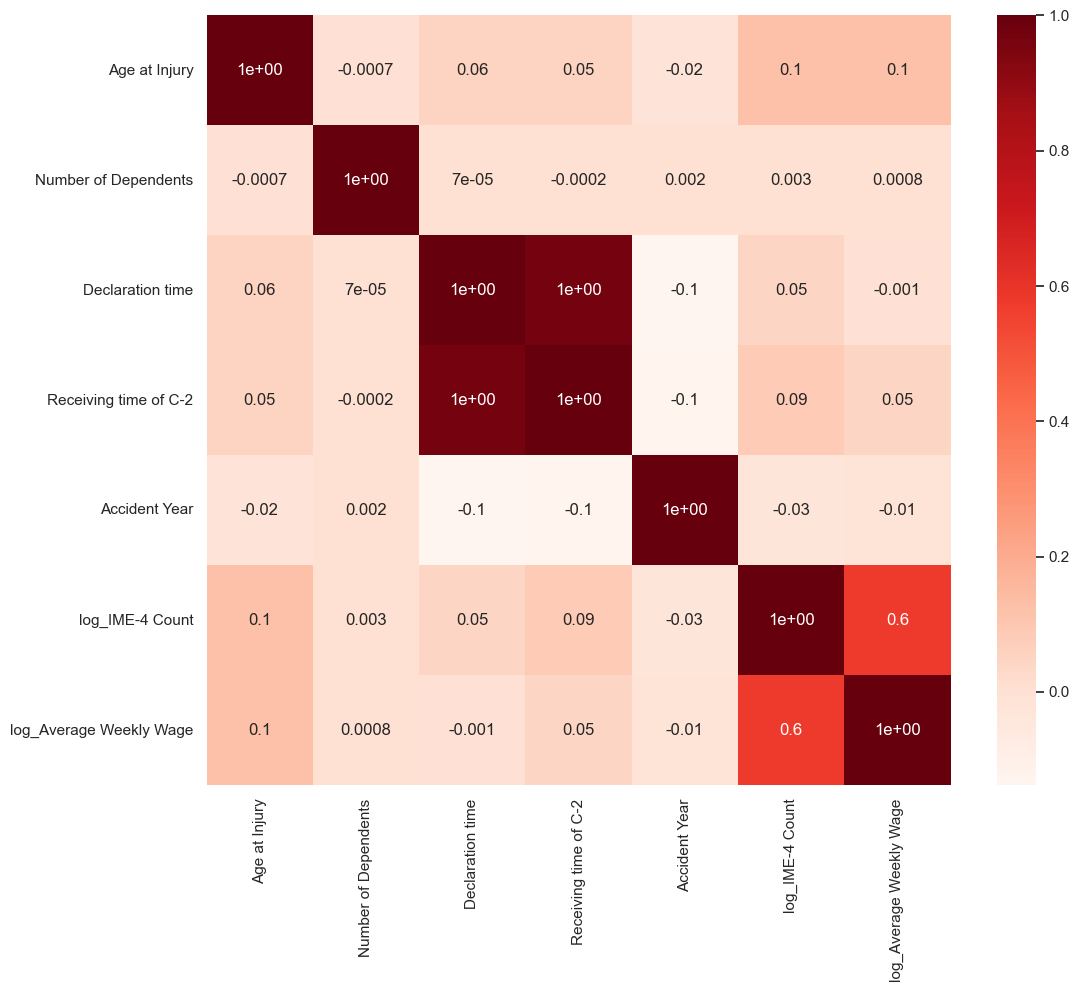

In [144]:
cor_heatmap(cor_spearman)

<a class="anchor" id="DT">
    
### 4.3 Decision Tree

</a>

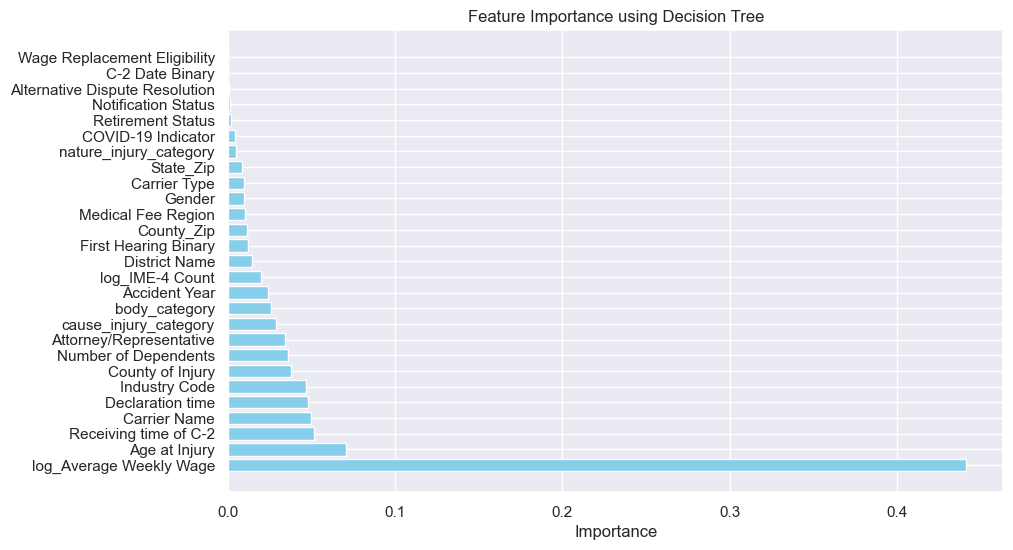

All Sorted Features by Importance:
log_Average Weekly Wage: 0.4416
Age at Injury: 0.0703
Receiving time of C-2: 0.0513
Carrier Name: 0.0497
Declaration time: 0.0478
Industry Code: 0.0466
County of Injury: 0.0375
Number of Dependents: 0.0358
Attorney/Representative: 0.0343
cause_injury_category: 0.0284
body_category: 0.0259
Accident Year: 0.0237
log_IME-4 Count: 0.0197
District Name: 0.0143
First Hearing Binary: 0.0118
County_Zip: 0.0115
Medical Fee Region: 0.0099
Gender: 0.0095
Carrier Type: 0.0092
State_Zip: 0.0085
nature_injury_category: 0.0048
COVID-19 Indicator: 0.0043
Retirement Status: 0.0018
Notification Status: 0.0014
Alternative Dispute Resolution: 0.0005
C-2 Date Binary: 0.0000
Wage Replacement Eligibility: 0.0000

Important Features Selected (above threshold):
['Age at Injury', 'Attorney/Representative', 'Carrier Name', 'County of Injury', 'Industry Code', 'Number of Dependents', 'Declaration time', 'Receiving time of C-2', 'log_Average Weekly Wage', 'cause_injury_category']

In [145]:
column_names = X_train.columns  
threshold = len(X_train.columns)/1000


dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train_scaled, y_train)
    
feature_importances = dt_model.feature_importances_
feature_importance_dict = dict(zip(column_names, feature_importances))
sorted_features = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)

important_features = [
        feature for feature, importance in feature_importance_dict.items() if importance > threshold
    ]
    
feature_names = [feature for feature, importance in sorted_features]
importances = [importance for feature, importance in sorted_features]
    
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance using Decision Tree')
plt.show()

print("All Sorted Features by Importance:")
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")

print("\nImportant Features Selected (above threshold):")
print(important_features)

selected_columns_dt =  important_features

<a class="anchor" id="RF">
    
### 4.4 Random Forest

</a>

In [146]:
importances = RandomForestClassifier(random_state=42).fit(X_train_scaled, y_train).feature_importances_

feature_importance = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

# Select the top features
selected_columns_rf = feature_importance[feature_importance['Importance'] > threshold]['Feature'].tolist()
print("Top Features:", selected_columns_rf)

                           Feature  Importance
19    Wage Replacement Eligibility    0.202573
18         log_Average Weekly Wage    0.163931
0                    Age at Injury    0.061134
14           Receiving time of C-2    0.056392
2          Attorney/Representative    0.054487
13                Declaration time    0.052633
17                 log_IME-4 Count    0.051859
3                     Carrier Name    0.047962
9                    Industry Code    0.042715
5                 County of Injury    0.037779
11            Number of Dependents    0.036037
22           cause_injury_category    0.029505
15            First Hearing Binary    0.025836
24                   body_category    0.025683
16                   Accident Year    0.023320
7                    District Name    0.016669
4                     Carrier Type    0.013196
26                      County_Zip    0.012273
10              Medical Fee Region    0.011588
8                           Gender    0.010060
25           

### 4.5 XGBoosting

In [147]:
model = XGBClassifier(
    random_state=42,
    n_estimators=50,  
    max_depth=3,      
    use_label_encoder=False,
    eval_metric='mlogloss'  
)


model.fit(X_train_scaled, y_train)
importances_xgb = model.feature_importances_

feature_importance = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': importances_xgb
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

# Select the top features
selected_features_xgb = feature_importance[feature_importance['Importance'] > threshold]['Feature'].tolist()
print("Top Features:", selected_features_xgb)

                           Feature  Importance
19    Wage Replacement Eligibility    0.700465
2          Attorney/Representative    0.070536
18         log_Average Weekly Wage    0.051172
24                   body_category    0.019597
9                    Industry Code    0.019219
22           cause_injury_category    0.013641
15            First Hearing Binary    0.013372
17                 log_IME-4 Count    0.012717
16                   Accident Year    0.012484
14           Receiving time of C-2    0.012331
13                Declaration time    0.011705
6               COVID-19 Indicator    0.010753
4                     Carrier Type    0.009950
3                     Carrier Name    0.007877
1   Alternative Dispute Resolution    0.007647
7                    District Name    0.007529
5                 County of Injury    0.006152
8                           Gender    0.003541
0                    Age at Injury    0.002394
10              Medical Fee Region    0.002391
23          n

<a class="anchor" id="RFE">
    
### 4.6 RFE

</a>

In [148]:
# Initialize variables
nf = len(X_train_scaled.columns)
nof_list = np.arange(1, nf+1)            
high_score = 0

# Variables to store the optimum features
nof = 0           
train_score_list = []
val_score_list = []

for n in range(len(nof_list)):
    model = LogisticRegression()
    
    # Recursive Feature Elimination (RFE)
    rfe = RFE(estimator=model, n_features_to_select=nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
    X_val_rfe = rfe.transform(X_val_scaled)
    
    # Fit the model on training data
    model.fit(X_train_rfe, y_train)
    
    # Predictions for F1 Macro scores
    train_preds = model.predict(X_train_rfe)
    val_preds = model.predict(X_val_rfe)
    
    # Calculate F1 Macro scores
    train_f1_macro = f1_score(y_train, train_preds, average='macro')
    val_f1_macro = f1_score(y_val, val_preds, average='macro')
    
    train_score_list.append(train_f1_macro)
    val_score_list.append(val_f1_macro)
    
    # Check best score
    if val_f1_macro >= high_score:
        high_score = val_f1_macro
        nof = nof_list[n]
        
        #adding mention of variables to keep
        selected_features_rfe_lr = pd.Series(rfe.support_, index = X_train_scaled.columns)



# Display results
print("Training F1 Macro Scores:", train_score_list)
print("Validation F1 Macro Scores:", val_score_list)
print("Optimum number of features: %d" % nof)
print("Score with %d features: %f" % (nof, high_score))
print(f"Features to select: \n{selected_features_rfe_lr}")

Training F1 Macro Scores: [0.20770332963874671, 0.20814098866821457, 0.21704197637987346, 0.21578814138174815, 0.21510357218705872, 0.22409778992497353, 0.22528593702642044, 0.2280031138114585, 0.22695834699950151, 0.2588385044503583, 0.27931464224447894, 0.27749183343595896, 0.2776354669662769, 0.2781498271265446, 0.2777478750404343, 0.2800679406193743, 0.2795404049461009, 0.28041913944886526, 0.27870729430333974, 0.2789699808740787, 0.2796066344387019, 0.28019449223633497, 0.2807837826050591, 0.28119467188951264, 0.28096393336313014, 0.28099172114491944, 0.28099172114491944]
Validation F1 Macro Scores: [0.203471977508924, 0.2040063789366317, 0.21397973001240522, 0.21196474822065983, 0.21161182014890006, 0.2212135928653551, 0.22277369543765763, 0.22528021009639815, 0.2246972107416916, 0.25532594993249336, 0.27472525662656233, 0.27292402179738745, 0.2729626502674064, 0.27359664066643263, 0.27310179903728304, 0.27519252239999964, 0.2747303676943623, 0.27513718009669014, 0.27369986417452

In [149]:
# Extract only the features to keep (True values)
features_to_keep = selected_features_rfe_lr[selected_features_rfe_lr].index
selected_features_rfe_lr = features_to_keep.tolist()
# Display the selected features
print("Selected Features to Keep:")
print(selected_features_rfe_lr)


Selected Features to Keep:
['Age at Injury', 'Alternative Dispute Resolution', 'Attorney/Representative', 'Carrier Name', 'Carrier Type', 'County of Injury', 'COVID-19 Indicator', 'District Name', 'Gender', 'Industry Code', 'Medical Fee Region', 'Declaration time', 'Receiving time of C-2', 'First Hearing Binary', 'Accident Year', 'log_IME-4 Count', 'log_Average Weekly Wage', 'Wage Replacement Eligibility', 'Retirement Status', 'Notification Status', 'cause_injury_category', 'nature_injury_category', 'body_category', 'State_Zip']


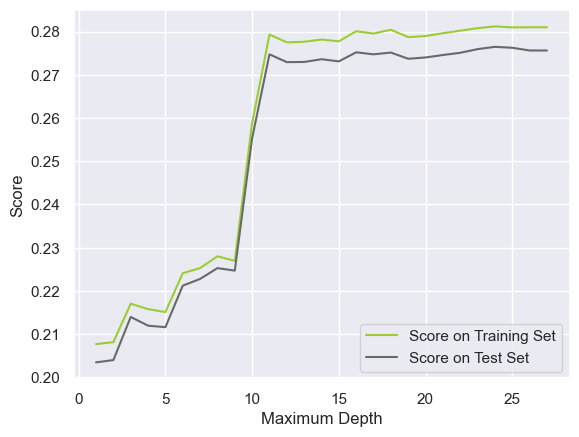

In [150]:
plt.plot(list(range(1,nf+1)), train_score_list, label="Score on Training Set", color='yellowgreen')
plt.plot(list(range(1,nf+1)), val_score_list, label="Score on Test Set", color='dimgray')
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.show()

<a class="anchor" id="LASSO">
    
### 4.5 LASSO

</a>

In [151]:
# Ensure X_train_num_2_scaled is a DataFrame with columns from X_train_num_2
X_train_num_scaled_df = pd.DataFrame(X_train_num_scaled, columns=X_train_num.columns)

# Fit the LassoCV model
reg = LassoCV()
reg.fit(X_train_num_scaled_df, y_train)

# Create a Series of coefficients with column names as the index
coef = pd.Series(reg.coef_, index=X_train_num.columns)

selected_features_lasso = coef[coef != 0].index.tolist()

# Display the coefficients
print(coef)

Age at Injury              0.027183
Number of Dependents      -0.003062
Declaration time           0.000000
Receiving time of C-2     -0.000000
Accident Year             -1.830857
log_IME-4 Count            0.945204
log_Average Weekly Wage    2.438273
dtype: float64


In [152]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 5 variables and eliminated the other 2 variables


<a class="anchor" id="importantvariablesFS">
    
### 4.6 Important Variables from Feature Selection

</a>

In [153]:
important_features_chi2 = set(selected_columns_chi2)
important_features_rf = set(selected_columns_rf)  
important_features_dt = set(selected_columns_dt)
important_features_rfe = set(selected_features_rfe_lr)
important_features_lasso = set(selected_features_lasso)
important_features_xgb = set(selected_features_xgb) 

# Combine all features to count appearances
all_important_features = (
    list(important_features_chi2) +
    list(important_features_rf) +
    list(important_features_dt) +
    list(important_features_rfe) +
    list(important_features_lasso) +
    list(important_features_xgb)
)
feature_counts = Counter(all_important_features)

# Set a threshold for how many methods a feature needs to appear in to be selected
threshold = 2  
selected_features = [feature for feature, count in feature_counts.items() if count >= threshold]

print("Features Selected (Appeared in >= {} Methods):".format(threshold))
print(selected_features)

Features Selected (Appeared in >= 2 Methods):
['Wage Replacement Eligibility', 'Carrier Name', 'Retirement Status', 'Medical Fee Region', 'COVID-19 Indicator', 'Industry Code', 'nature_injury_category', 'Alternative Dispute Resolution', 'Carrier Type', 'Gender', 'First Hearing Binary', 'State_Zip', 'County of Injury', 'Attorney/Representative', 'cause_injury_category', 'body_category', 'District Name', 'Notification Status', 'log_Average Weekly Wage', 'Receiving time of C-2', 'Declaration time', 'log_IME-4 Count', 'Age at Injury', 'Number of Dependents', 'Accident Year']


> As 'Receiving time of C-2' and 'Declaration time' have a high correlation (>0.8) we should drop one of them.
> Based on the other feature selection like decision tree, random forest and xgboosting 'Receiving time of C-2' is more important, so we decided to drop 'Declaration time'

In [167]:
#Selection 
selected_features = ['Wage Replacement Eligibility', 'Carrier Name', 'Retirement Status', 'Medical Fee Region', 
                     'COVID-19 Indicator', 'Industry Code', 'nature_injury_category', 'Alternative Dispute Resolution', 
                     'Carrier Type', 'Gender', 'First Hearing Binary', 'State_Zip', 'County of Injury', 'Attorney/Representative',
                     'cause_injury_category', 'body_category', 'District Name', 'Notification Status', 'log_Average Weekly Wage',
                     'Receiving time of C-2', 'log_IME-4 Count', 'Age at Injury', 'Number of Dependents', 'Accident Year']

                    

In [168]:
len(selected_features)

24

<a class="anchor" id="Modelling">
    
# 5. Modelling

</a>

In [139]:
column_names = X_train.columns
column_names

Index(['Age at Injury', 'Alternative Dispute Resolution',
       'Attorney/Representative', 'Carrier Name', 'Carrier Type',
       'County of Injury', 'COVID-19 Indicator', 'District Name', 'Gender',
       'Industry Code', 'Medical Fee Region', 'Number of Dependents',
       'C-2 Date Binary', 'Declaration time', 'Receiving time of C-2',
       'First Hearing Binary', 'Accident Year', 'log_IME-4 Count',
       'log_Average Weekly Wage', 'Wage Replacement Eligibility',
       'Retirement Status', 'Notification Status', 'cause_injury_category',
       'nature_injury_category', 'body_category', 'State_Zip', 'County_Zip'],
      dtype='object')

In [140]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=column_names)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=column_names)

In [141]:
#common_features = [feature for feature in selected_features if feature in X_train_scaled_df.columns]

X_train_selected = X_train_scaled_df[selected_features]
X_val_selected = X_val_scaled_df[selected_features]

# Display the shapes of the modified datasets to confirm alignment
print("X_train with selected features shape:", X_train_selected.shape)
print("X_val with selected features shape:", X_val_selected.shape)

X_train with selected features shape: (404864, 25)
X_val with selected features shape: (143507, 25)


In [142]:
y_train_series = pd.Series(y_train)

class_distribution_train = y_train_series.value_counts(normalize=True)


print("Class distribution in training set:")
print(class_distribution_train)

Class distribution in training set:
1    0.506810
3    0.260297
2    0.120776
4    0.084824
0    0.018875
5    0.007437
7    0.000808
6    0.000173
Name: proportion, dtype: float64


> The distribution of target categories shows significant imbalance. To address this issue, we experimented with techniques like RandomOverSampler and SMOTE. However, neither approach resulted in an improved score on Kaggle. As a result, we decided not to incorporate them into the final model.

In [143]:
%%capture
'''
#pip install imbalanced-learn

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

#ros = RandomOverSampler(random_state=42)
#X_train_over_sample, y_train_over_sample = ros.fit_resample(X_train_selected, y_train)

smote = SMOTE(random_state=42)
X_train_over_sample, y_train_over_sample = smote.fit_resample(X_train_selected, y_train)
'''

## 5.1. Models Assessment

In [144]:
# Dictionary to store results for each model
results_val = {}
results_train = {}
overfitting_results = {}
models = []

def evaluate_model(model, model_name):
    model.fit(X_train_selected, y_train)
    models.append(model)
    
    # Predictions and metrics for validation set
    y_pred_val = model.predict(X_val_selected)
    y_prob_val = model.predict_proba(X_val_selected) if hasattr(model, "predict_proba") else None

    val_accuracy = accuracy_score(y_val, y_pred_val)
    val_precision = precision_score(y_val, y_pred_val, average='weighted')
    val_recall = recall_score(y_val, y_pred_val, average='weighted')
    val_f1 = f1_score(y_val, y_pred_val, average='macro')
    val_conf_matrix = confusion_matrix(y_val, y_pred_val)

    # Validation AUC
    if y_prob_val is not None and len(np.unique(y_val)) > 2:
        val_auc = roc_auc_score(y_val, y_prob_val, multi_class='ovr', average='macro')
    elif y_prob_val is not None:
        val_auc = roc_auc_score(y_val, y_prob_val[:, 1])  # Binary classification
    else:
        val_auc = None

    # Store validation results
    results_val[model_name] = {
        'Accuracy': val_accuracy,
        'Precision': val_precision,
        'Recall': val_recall,
        'F1 Score': val_f1,
        'Confusion Matrix': val_conf_matrix,
        'ROC AUC': val_auc if val_auc is not None else 'Not applicable'
    }

    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(f"{model_name} - Accuracy: {val_accuracy:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1 Score: {val_f1:.4f}")
    if val_auc is not None:
        print(f"{model_name} - ROC AUC: {val_auc:.4f}")
    print(f"Confusion Matrix for {model_name}:\n{val_conf_matrix}\n")
    print(f"Classification Report for {model_name}:\n{classification_report(y_val, y_pred_val)}\n")
    
    # Predictions and metrics for training set
    y_pred_train = model.predict(X_train_selected)
    y_prob_train = model.predict_proba(X_train_selected) if hasattr(model, "predict_proba") else None

    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train, average='weighted')
    train_recall = recall_score(y_train, y_pred_train, average='weighted')
    train_f1 = f1_score(y_train, y_pred_train, average='macro')
    train_conf_matrix = confusion_matrix(y_train, y_pred_train)

    # Training AUC
    if y_prob_train is not None and len(np.unique(y_train)) > 2:
        train_auc = roc_auc_score(y_train, y_prob_train, multi_class='ovr', average='macro')
    elif y_prob_train is not None:
        train_auc = roc_auc_score(y_train, y_prob_train[:, 1])  # Binary classification
    else:
        train_auc = None

    # Store training results
    results_train[model_name] = {
        'Accuracy': train_accuracy,
        'Precision': train_precision,
        'Recall': train_recall,
        'F1 Score': train_f1,
        'Confusion Matrix': train_conf_matrix,
        'ROC AUC': train_auc if train_auc is not None else 'Not applicable'
    }

    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(f"{model_name} - Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1 Score: {train_f1:.4f}")
    if train_auc is not None:
        print(f"{model_name} - ROC AUC: {train_auc:.4f}")
    print(f"Confusion Matrix for {model_name}:\n{train_conf_matrix}\n")
    print(f"Classification Report for {model_name}:\n{classification_report(y_train, y_pred_train)}\n")
    
    # Overfitting calculation
    overfitting_results[model_name] = {
        'Accuracy Gap': train_accuracy - val_accuracy,
        'F1 Score Gap': train_f1 - val_f1,
        'Precision Gap': train_precision - val_precision,
        'Recall Gap': train_recall - val_recall
    }
    
    print('___________________________________________________________________________________________________________')
    print('                                                 OVERFITTING                                               ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(f"{model_name} - Accuracy Gap: {train_accuracy - val_accuracy:.4f}")
    print(f"{model_name} - F1 Score Gap: {train_f1 - val_f1:.4f}")
    print(f"{model_name} - Precision Gap: {train_precision - val_precision:.4f}")
    print(f"{model_name} - Recall Gap: {train_recall - val_recall:.4f}\n")


## 5.2. Models

In [145]:
# 1. Logistic Regression
logistic_model = LogisticRegression(max_iter=1000, 
                                    random_state=42)
evaluate_model(logistic_model, "Logistic Regression") 



___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
Logistic Regression - Accuracy: 0.7569, Precision: 0.6862, Recall: 0.7569, F1 Score: 0.2818
Logistic Regression - ROC AUC: 0.8999
Confusion Matrix for Logistic Regression:
[[   17  2826   166   107     3     0     0     0]
 [   78 71215   852   604    21     0     0     0]
 [    6  9625  1018  5972   606     0     0     0]
 [   42  2016  1252 31785  2031     0     0     1]
 [    0   198   300  6982  4590     0     0     0]
 [    0     1    47   863   142     0     0     0]
 [    0     0     0    16     8     0     0     0]
 [    0    13    16    76    11     0     0     1]]

Classification Report for Logistic Regression:
              precision    recall  f1-score   s

In [146]:
# 2. Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42, class_weight = 'balanced')
evaluate_model(dt_model, "Decision Tree Classifier") 



___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
Decision Tree Classifier - Accuracy: 0.6803, Precision: 0.6845, Recall: 0.6803, F1 Score: 0.3382
Decision Tree Classifier - ROC AUC: 0.6397
Confusion Matrix for Decision Tree Classifier:
[[ 1012  1652   291   151     7     2     0     4]
 [ 1538 61748  8221  1214    25     8     0    16]
 [  213  7627  3811  4544   932    85     1    14]
 [  157  1758  5265 24922  4304   655    18    48]
 [   24   220  1200  4381  6042   191     6     6]
 [    3    16    86   652   209    85     2     0]
 [    0     0     2    14     4     4     0     0]
 [    2    17    24    65     5     0     0     4]]

Classification Report for Decision Tree Classifier:
              precision    

In [147]:
# 3. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, 
                                  random_state=42        
                                  )

evaluate_model(rf_model, "Random Forest Classifier") 

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
Random Forest Classifier - Accuracy: 0.7810, Precision: 0.7363, Recall: 0.7810, F1 Score: 0.3506
Random Forest Classifier - ROC AUC: 0.8721
Confusion Matrix for Random Forest Classifier:
[[  734  2208    75    99     3     0     0     0]
 [  317 71037   724   671    21     0     0     0]
 [   28  9167  1657  5794   580     0     0     1]
 [   22  1855  1163 32151  1933     2     0     1]
 [    0   200   305  5068  6496     1     0     0]
 [    0     3    43   902   105     0     0     0]
 [    0     0     0    18     6     0     0     0]
 [    0    22     7    86     2     0     0     0]]

Classification Report for Random Forest Classifier:
              precision    

In [148]:
# 4. Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, random_state=42)
evaluate_model(gb_model, "Gradient Boosting Classifier") 

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
Gradient Boosting Classifier - Accuracy: 0.7800, Precision: 0.7348, Recall: 0.7800, F1 Score: 0.3664
Gradient Boosting Classifier - ROC AUC: 0.9154
Confusion Matrix for Gradient Boosting Classifier:
[[  828  2117    79    88     5     0     0     2]
 [  410 71097   581   661    21     0     0     0]
 [   39  9337  1413  5809   622     0     3     4]
 [   46  1974  1061 31758  2247     4    27    10]
 [    1   219   303  4714  6826     5     1     1]
 [    0     4    40   880   123     4     2     0]
 [    0     0     5    15     2     1     1     0]
 [    0    20     9    82     1     0     0     5]]

Classification Report for Gradient Boosting Classifier:
           

In [170]:
# 5. MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
evaluate_model(mlp_model, "Neural Network") 


___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
Neural Network - Accuracy: 0.7775, Precision: 0.7308, Recall: 0.7775, F1 Score: 0.3517
Neural Network - ROC AUC: 0.9238
Confusion Matrix for Neural Network:
[[  646  2313    72    85     1     0     0     2]
 [  322 71275   568   587    16     0     0     2]
 [   41  9412  1619  5599   550     1     0     5]
 [   35  2107  1367 31755  1848     2     0    13]
 [    2   220   366  5205  6274     0     0     3]
 [    0     3    51   922    77     0     0     0]
 [    0     0     2    19     2     0     0     1]
 [    0    26     6    78     2     0     0     5]]

Classification Report for Neural Network:
              precision    recall  f1-score   support

           0

In [150]:
# 6. KNeighborsClassifier
knn_model = KNeighborsClassifier(algorithm='kd_tree', metric = 'manhattan')
evaluate_model(knn_model, "KNNeighbors") 

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
KNNeighbors - Accuracy: 0.7486, Precision: 0.7027, Recall: 0.7486, F1 Score: 0.3376
KNNeighbors - ROC AUC: 0.7293
Confusion Matrix for KNNeighbors:
[[  835  2049   123   110     2     0     0     0]
 [  983 69319  1762   673    33     0     0     0]
 [  250  9023  2103  5138   707     4     0     2]
 [  192  2119  2634 29166  2966    44     0     6]
 [   18   261   680  5095  5998    17     0     1]
 [    2    13    65   806   155    12     0     0]
 [    0     0     0    21     3     0     0     0]
 [    0    22    18    73     3     0     0     1]]

Classification Report for KNNeighbors:
              precision    recall  f1-score   support

           0       0.37 

In [151]:
# 7. GaussianNB
nb_model = GaussianNB()
evaluate_model(nb_model, "Naive Bayes")

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
Naive Bayes - Accuracy: 0.2807, Precision: 0.6883, Recall: 0.2807, F1 Score: 0.1442
Naive Bayes - ROC AUC: 0.8368
Confusion Matrix for Naive Bayes:
[[  205   623  1941     5    24     0    27   294]
 [  536 26080 43998    42   173     0   118  1823]
 [   49  1780  8299   216  3341     0  2395  1147]
 [  573   212  3370  1050 15077     5 15481  1359]
 [    0     2   331   110  4592     0  6738   297]
 [    0     0    10     3    26     0   971    43]
 [    0     0     0     1     0     0    22     1]
 [    0     0     9     0     2     0    77    29]]

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.15 

In [169]:
# 8. XGBClassifier
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y_train)),  
    n_estimators=100,
    use_label_encoder=False, 
    eval_metric='mlogloss',   
    random_state = 42,
 )

# Evaluate the initial model
evaluate_model(xgb_model, "XGBoost") 

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
XGBoost - Accuracy: 0.7843, Precision: 0.7415, Recall: 0.7843, F1 Score: 0.3779
XGBoost - ROC AUC: 0.9316
Confusion Matrix for XGBoost:
[[ 1027  1931    75    81     4     0     0     1]
 [  441 71032   607   663    27     0     0     0]
 [   42  9220  1580  5717   659     2     1     6]
 [   39  1793  1083 31838  2357     8     1     8]
 [    1   190   305  4502  7071     1     0     0]
 [    0     3    38   881   128     3     0     0]
 [    0     0     2    19     3     0     0     0]
 [    0    22     7    77     4     0     0     7]]

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.66      0.33      0

## 5.3. Combined models

In [153]:

voting_model = VotingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('nb', nb_model),
    ],
    voting='soft',
    weights=[0.7, 0.3]  # Give higher weight to better-performing model
)

evaluate_model(voting_model, "Voting Model") 

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
Voting Model - Accuracy: 0.7696, Precision: 0.7393, Recall: 0.7696, F1 Score: 0.3714
Voting Model - ROC AUC: 0.9136
Confusion Matrix for Voting Model:
[[  858  1750   378    61     2     0     4    66]
 [  394 68895  2693   532    32     0     5   219]
 [   28  7984  2791  5293   887     0   101   143]
 [   46  1231  1729 30166  3534     7   190   224]
 [    0    78   413  3691  7716     0   153    19]
 [    0     2    42   868   130     3     8     0]
 [    0     0     1    18     3     0     2     0]
 [    0    16     8    70     3     0     4    16]]

Classification Report for Voting Model:
              precision    recall  f1-score   support

           0       0

In [163]:
stacking_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('nn', mlp_model),
    ],
    final_estimator = LogisticRegression()
)
evaluate_model(stacking_model, "Stacking Model")

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
Stacking Model - Accuracy: 0.7821, Precision: 0.7408, Recall: 0.7821, F1 Score: 0.3817
Stacking Model - ROC AUC: 0.9089
Confusion Matrix for Stacking Model:
[[ 1079  1844   124    70     1     0     0     1]
 [  486 70632  1122   511    19     0     0     0]
 [   42  8904  2208  5496   575     2     0     0]
 [   30  1581  1850 31438  2159    65     0     4]
 [    1   142   421  4643  6851    12     0     0]
 [    0     1    51   857   120    24     0     0]
 [    0     0     1    20     2     1     0     0]
 [    0    20    11    80     2     1     0     3]]

Classification Report for Stacking Model:
              precision    recall  f1-score   support

           0

In [154]:
stacking_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('nb', nb_model),
    ],
    final_estimator = LogisticRegression()
)
evaluate_model(stacking_model, "Stacking Model")

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
Stacking Model - Accuracy: 0.7836, Precision: 0.7422, Recall: 0.7836, F1 Score: 0.3741
Stacking Model - ROC AUC: 0.9169
Confusion Matrix for Stacking Model:
[[ 1128  1824    83    82     2     0     0     0]
 [  526 70693   936   593    22     0     0     0]
 [   45  8975  2045  5556   605     1     0     0]
 [   39  1689  1476 31632  2251    40     0     0]
 [    1   156   369  4598  6937     9     0     0]
 [    0     2    38   876   124    13     0     0]
 [    0     0     2    19     2     1     0     0]
 [    0    22     7    84     3     1     0     0]]

Classification Report for Stacking Model:
              precision    recall  f1-score   support

           0

In [155]:
# Summary of model performance for comparison
summary_df = pd.DataFrame({model: metrics for model, metrics in results_val.items()}).T[['Accuracy', 'F1 Score']]
print("\nSummary of Model Performance:")
print(summary_df)


Summary of Model Performance:
                              Accuracy  F1 Score
Logistic Regression           0.756939  0.281833
Decision Tree Classifier      0.680273  0.338202
Random Forest Classifier      0.780972  0.350618
Gradient Boosting Classifier  0.779976  0.366425
Neural Network                0.777481   0.35175
KNNeighbors                   0.748632  0.337626
Naive Bayes                   0.280662  0.144244
XGBoost                       0.784338  0.377868
Voting Model                  0.769628  0.371364
Stacking Model                0.783572  0.374124


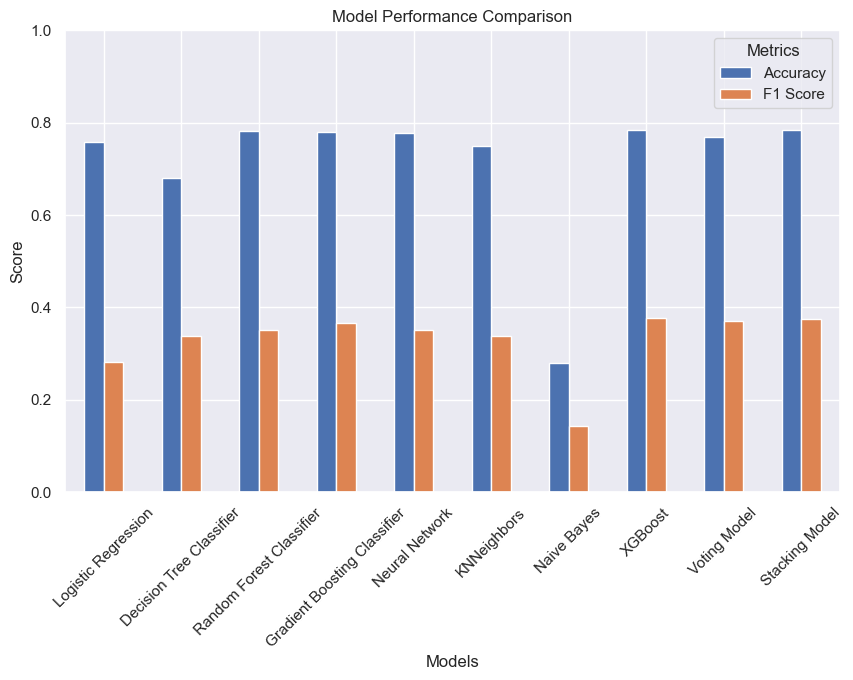

In [156]:
# Plotting the bar chart for model comparison
summary_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.xlabel("Models")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metrics")
plt.ylim(0, 1)  
plt.show()

### Best Models Hyperparameters Tuning

In [157]:
# Combine train and validation datasets
X_combined = np.concatenate([X_train_selected, X_val_selected ])
y_combined = np.concatenate([y_train, y_val])

# Create a test fold index (-1 for train, 0 for validation)
test_fold = [-1] * len(X_train_selected ) + [0] * len(X_val_selected)

print('Test fold: ', len(test_fold))
print('X_combined: ', len(X_combined))
print('y_combined: ', len(y_combined))

# Define the PredefinedSplit
ps = PredefinedSplit(test_fold=test_fold)

Test fold:  548371
X_combined:  548371
y_combined:  548371


In [158]:
%%capture
'''
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],        
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],        
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None], 
    'bootstrap': [True, False],             
    'criterion': ['gini', 'entropy']
}

rf_model = RandomForestClassifier(random_state = 42)

# Set up the GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='f1_macro',        
    cv=ps,                      
    verbose=2,                 
    n_jobs=-1                  
)

grid_search_rf.fit(X_combined, y_combined)

print("Best Parameters:", grid_search_rf.best_params_)
print("Best Cross-Validation Score:", grid_search_rf.best_score_)

best_rf_model = grid_search_rf.best_estimator_

evaluate_model(best_rf_model, "Random Forest (Best Parameters)")
'''

In [159]:
%%capture
'''
# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 150, 200],         
    'max_depth': [3, 5, 10],                
    'learning_rate': [0.01, 0.1, 0.2],      
    'subsample': [0.8, 1.0],                
    'colsample_bytree': [0.6, 0.8, 1.0],         
    'gamma': [0, 1, 5],                     
    'reg_alpha': [0, 0.1, 1],              
    'reg_lambda': [1, 10, 100]              
}


# Set up the GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='f1_macro',        
    cv= ps,                      
    verbose=2,                 
    n_jobs=-1                  
)

# Perform the grid search
grid_search_xgb.fit(X_combined, y_combined)


# Output the best parameters and best score
print("Best Parameters:", grid_search_xgb.best_params_)
print("Best Cross-Validation Score:", grid_search_xgb.best_score_)

# Train the final XGBoost model with the best parameters
best_xgb_model = grid_search_xgb.best_estimator_

# Evaluate the final model on the validation set
evaluate_model(best_xgb_model, " XGBoost (Best Parameters)")

'''

In [160]:
# Best Random Forest Classifier
best_rf_model_1 = RandomForestClassifier(n_estimators=300, 
                                  random_state=42,       
                                  max_depth = 20,    
                                  min_samples_split= 10,        
                                  min_samples_leaf = 4,          
                                  max_features = None, 
                                  bootstrap =True,              
                                  criterion = 'entropy')

evaluate_model(best_rf_model_1, "Random Forest Classifier") 

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
Random Forest Classifier - Accuracy: 0.7810, Precision: 0.7369, Recall: 0.7810, F1 Score: 0.3621
Random Forest Classifier - ROC AUC: 0.9083
Confusion Matrix for Random Forest Classifier:
[[ 1018  1924    68   105     4     0     0     0]
 [  488 70838   704   720    20     0     0     0]
 [   47  9181  1670  5655   674     0     0     0]
 [   43  1765  1239 31700  2376     4     0     0]
 [    0   181   347  4688  6854     0     0     0]
 [    0     2    42   878   130     1     0     0]
 [    0     0     0    19     5     0     0     0]
 [    0    22     8    82     5     0     0     0]]

Classification Report for Random Forest Classifier:
              precision    

In [171]:
# Best XGBClassifier
best_xgb_model_1 = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y_train)),  
    n_estimators=200,
    use_label_encoder=False,  
    eval_metric='mlogloss',   
    random_state = 42,
    max_depth =  10,
    learning_rate =  0.2,
    subsample = 0.8,
    colsample_bytree = 0.8,
    gamma = 1,
    reg_alpha = 0.1,
    reg_lambda = 1,

)

evaluate_model(best_xgb_model_1, "XGBoost") 

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
XGBoost - Accuracy: 0.7845, Precision: 0.7436, Recall: 0.7845, F1 Score: 0.3798
XGBoost - ROC AUC: 0.9323
Confusion Matrix for XGBoost:
[[ 1124  1810    83    97     5     0     0     0]
 [  461 70849   750   692    17     0     0     1]
 [   47  9093  1830  5596   652     3     0     6]
 [   43  1746  1251 31677  2383    16     0    11]
 [    1   186   330  4461  7089     3     0     0]
 [    0     2    42   871   129     9     0     0]
 [    0     0     3    18     3     0     0     0]
 [    0    21     7    81     4     0     0     4]]

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.67      0.36      0

In [172]:
# Best Stacking Model

best_stacking_model = StackingClassifier(
    estimators=[
        ('xgb', best_xgb_model_1),
        ('nn', mlp_model),
    ],
    final_estimator = LogisticRegression()
)
evaluate_model(best_stacking_model, "Stacking Model")

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
Stacking Model - Accuracy: 0.7834, Precision: 0.7439, Recall: 0.7834, F1 Score: 0.3879
Stacking Model - ROC AUC: 0.9098
Confusion Matrix for Stacking Model:
[[ 1087  1837   119    73     3     0     0     0]
 [  449 70685  1098   525    13     0     0     0]
 [   42  8902  2264  5454   562     3     0     0]
 [   34  1601  1779 31532  2109    68     0     4]
 [    1   160   405  4675  6819    10     0     0]
 [    0     1    52   846   117    37     0     0]
 [    0     0     1    21     1     0     0     1]
 [    0    21    10    80     2     0     0     4]]

Classification Report for Stacking Model:
              precision    recall  f1-score   support

           0

# 6. Predictions

In [173]:
label_mapping = {
    0: '1. CANCELLED',
    1: '2. NON-COMP',
    2: '3. MED ONLY',
    3: '4. TEMPORARY',
    4: '5. PPD SCH LOSS',
    5: '6. PPD NSL',
    6: '7. PTD',
    7: '8. DEATH'
}

selected_models = [best_stacking_model]


def get_submission_filename(model, submission_dir='.'):
    model_name = type(model).__name__.lower()  
    existing_files = [f for f in os.listdir(submission_dir) if f.startswith(f"{model_name}_")]

    submission_numbers = []
    for file in existing_files:
        try:
            # Extract the submission number from the filename (assuming format: "model_name_submission_number.csv")
            submission_number = int(file.split('_')[1].split('.')[0])  # Get number before .csv
            submission_numbers.append(submission_number)
        except ValueError:
            continue

    if submission_numbers:
        submission_number = max(submission_numbers) + 1
    else:
        submission_number = 1

    return f"{model_name}_{submission_number}.csv"

for model in selected_models:
    if hasattr(model, 'feature_names_in_'):
        expected_features_rf = model.feature_names_in_  
        test_scaled_2 = test_scaled[expected_features_rf]  
        predictions = model.predict(test_scaled_2)
        
        predictions_decoded = [label_mapping[pred] for pred in predictions]

        submission = pd.DataFrame({
            "Claim Identifier": test["Claim Identifier"],  
            "Claim Injury Type": predictions_decoded       
        })

        submission = submission.sort_values(by="Claim Identifier").reset_index(drop=True)

        filename = get_submission_filename(model)

        submission.to_csv(filename, index=False)
        print(f"Submission saved as: {filename}")


Submission saved as: stackingclassifier_2.csv
